## Regresión sobre el dataset treasury
Alberto Armijo Ruiz

### Información sobre el dataset
El dataset **treasury** contiene información datos sobre la economía de EEUU desde 01/04/1980 hasta 02/04/2000 tomados de forma semanal. Este dataset contiene 1049 instancias cada una con quince características cada una; las características son números reales. El objetivo es predecir el valor de la variable *1MonthCDRate*.

En el siguiente enlace se puede ver más información sobre las variables: [http://funapp.cs.bilkent.edu.tr/DataSets/Data/TR.names](http://funapp.cs.bilkent.edu.tr/DataSets/Data/TR.names)

Según la información que se ha podido obtener de dicha página, la variable que queremos predecir, *1MonthCDRate* está calculando la tasa de interés que se le aplica a un *Certificate of Deposit* (un tipo de inversión) por un mes. Algunas de las características que tenemos son el ratio de rendimiento del Tesoro de EEUU en 1, 3 ó 5 años, ratios sobre bonos del Estado, el valor de la moneda de EEUU, el ratio efectivo de fondos por el Estado, el número total de cuentas corrientes, el número total de cuentas de ahorro, el total depositado por los bancos en prestamos, el ratio del valor del dolar conforme a otras monedas como el euro, la libra, etc...

## Análisis de datos
El dataset que debemos de leer está contenido en la carpeta *treasury* que contiene archivos .dat, estos archivos contiene la información del dataset **treasury**, tanto el dataset entero como 5 particiones utilizadas en validación cruzada.

Lo primero que haremos será leer el fichero y mirar que tipo de información contiene.

In [1]:
# Leemos el fichero del dataset. La forma de escribir el PATH puede variar dependiendo de la organización o del SO.
treasury = read.csv('treasury//treasury.dat', comment.char = '@', header = FALSE,
                   stringsAsFactors = FALSE)

# Añadimos los nombres de las características y de la variable que vamos a predecir.
# Se cambiará un poco los nombres de las variables para que no haya problemas con R.
y_var = 'MonthCDRate'
pred_vars = c('CMaturityRate_1Y', 'CMortgageRate_30Y', 'Rate_AuctionAverage_3M',
              'Rate_SecondaryMarket_3M', 'CMaturityRate_3Y', 'CMaturityRate_5Y',
              'bankCredit', 'currency', 'demandDeposits','federalFunds',
              'moneyStock', 'checkableDeposits', 'loansLeases',
              'savingsDeposits', 'tradeCurrencies')
colnames(treasury) = c(pred_vars,y_var)
str(treasury)

'data.frame':	1049 obs. of  16 variables:
 $ CMaturityRate_1Y       : num  92.1 86.4 97.5 102.6 128 ...
 $ CMortgageRate_30Y      : num  8.41 5.23 5.92 12 8.07 ...
 $ Rate_AuctionAverage_3M : num  10.41 8.53 9.06 16.9 12.24 ...
 $ Rate_SecondaryMarket_3M: num  7.71 4 5.58 10.4 7.14 ...
 $ CMaturityRate_3Y       : num  7.76 4.04 5.62 10.39 7.13 ...
 $ CMaturityRate_5Y       : num  8.8 6.3 6.53 13.06 9.28 ...
 $ bankCredit             : num  8.79 6.76 6.74 13.03 9.84 ...
 $ currency               : num  2665 3186 2132 1312 1839 ...
 $ demandDeposits         : num  230 336 183 122 164 ...
 $ federalFunds           : num  277 387 296 232 258 ...
 $ moneyStock             : num  8.27 3.76 6.22 12.48 7.88 ...
 $ checkableDeposits      : num  807 1144 729 436 598 ...
 $ loansLeases            : num  570 800 540 310 427 ...
 $ savingsDeposits        : num  2056 2225 1621 999 1412 ...
 $ tradeCurrencies        : num  912 1222 953 344 787 ...
 $ MonthCDRate            : num  8.3 4.02 5.99 11.55 

Por claridad me referiré a las variables del dataset por los nombres que le he puesto en vez de los que vienen en el archivo .dat

In [2]:
# Utilizaremos la función summary para ver la media de las variables.
summary(treasury)

 CMaturityRate_1Y CMortgageRate_30Y Rate_AuctionAverage_3M
 Min.   : 77.06   Min.   : 3.020    Min.   : 6.49         
 1st Qu.: 86.80   1st Qu.: 5.450    1st Qu.: 7.88         
 Median : 92.53   Median : 6.710    Median : 9.90         
 Mean   : 97.35   Mean   : 7.544    Mean   :10.40         
 3rd Qu.:104.74   3rd Qu.: 9.030    3rd Qu.:12.80         
 Max.   :142.65   Max.   :17.150    Max.   :18.63         
 Rate_SecondaryMarket_3M CMaturityRate_3Y CMaturityRate_5Y   bankCredit    
 Min.   : 2.670          Min.   : 2.690   Min.   : 4.090   Min.   : 4.170  
 1st Qu.: 4.990          1st Qu.: 4.980   1st Qu.: 5.890   1st Qu.: 6.140  
 Median : 5.810          Median : 5.770   Median : 7.440   Median : 7.760  
 Mean   : 6.851          Mean   : 6.829   Mean   : 8.117   Mean   : 8.359  
 3rd Qu.: 8.140          3rd Qu.: 8.090   3rd Qu.: 9.690   3rd Qu.: 9.980  
 Max.   :16.750          Max.   :16.760   Max.   :16.470   Max.   :16.130  
    currency    demandDeposits   federalFunds     money

### Cálculos de las medias y desviaciones

In [3]:
# Calculamos la media y la desviación estándar de las variables.
media = sapply(treasury,mean)
desviacion = sapply(treasury,sd)

# Mostramos los valores.
med_desv = cbind(media,desviacion)
med_desv

,media,desviacion
CMaturityRate_1Y,97.353633,14.471441
CMortgageRate_30Y,7.543937,3.105787
Rate_AuctionAverage_3M,10.400848,2.958872
Rate_SecondaryMarket_3M,6.851220,2.954287
CMaturityRate_3Y,6.829342,2.942284
CMaturityRate_5Y,8.117378,2.883880
bankCredit,8.359104,2.766248
currency,2639.677312,1010.520574
demandDeposits,256.847664,114.575372
federalFunds,308.115443,59.805094


### Representación de los datos

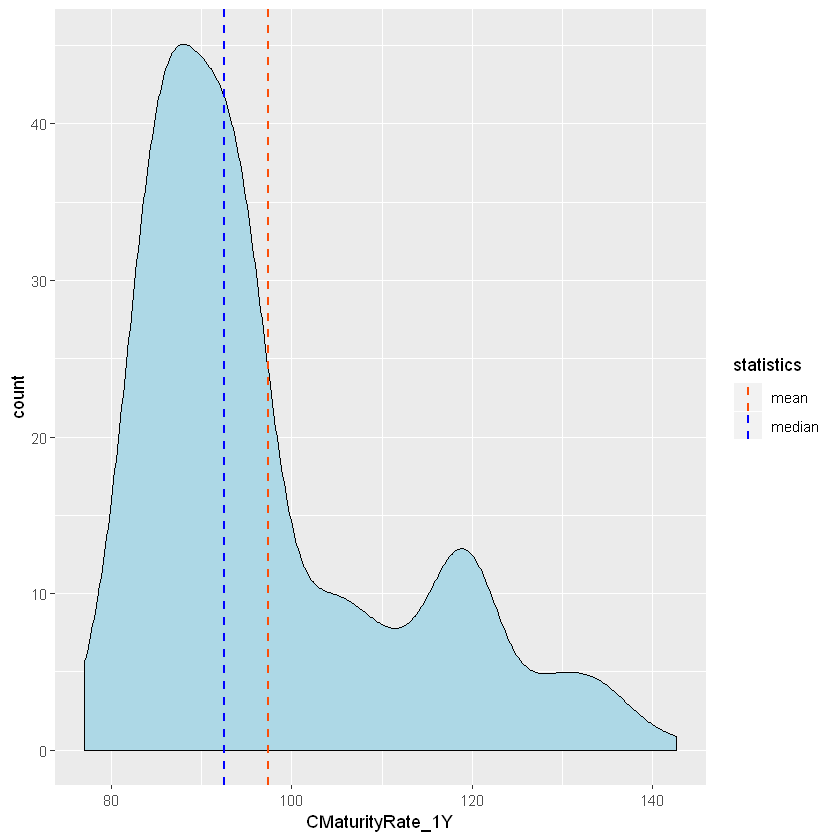

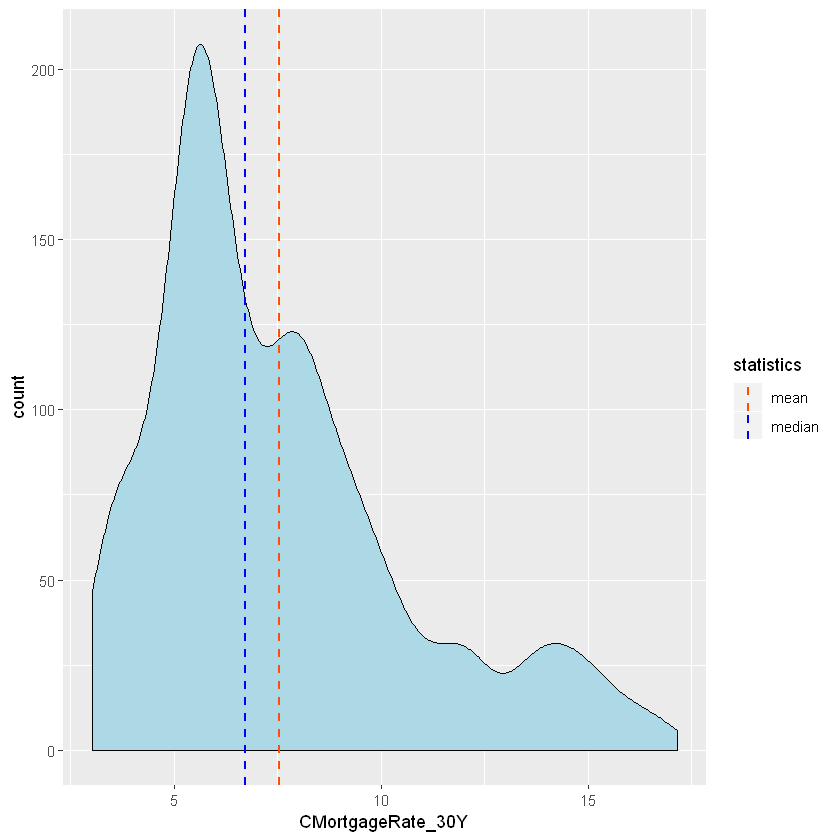

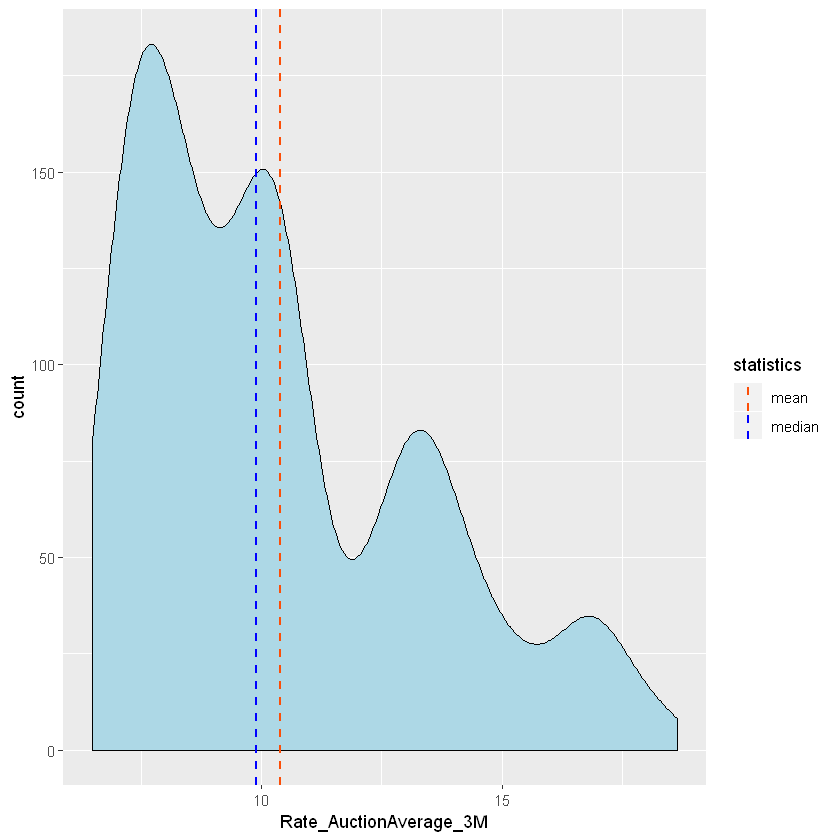

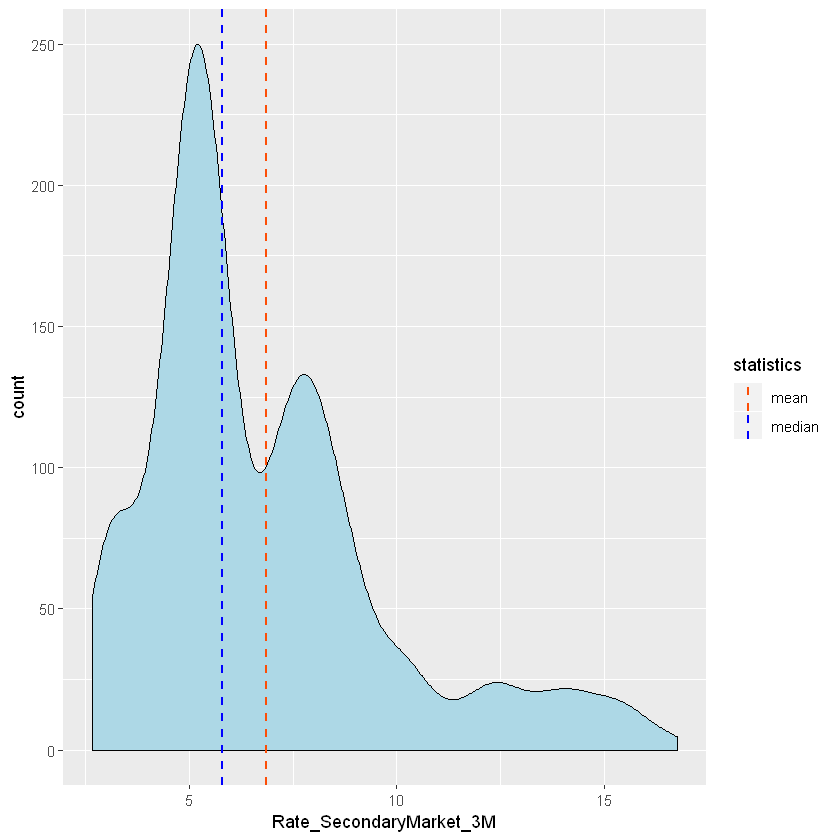

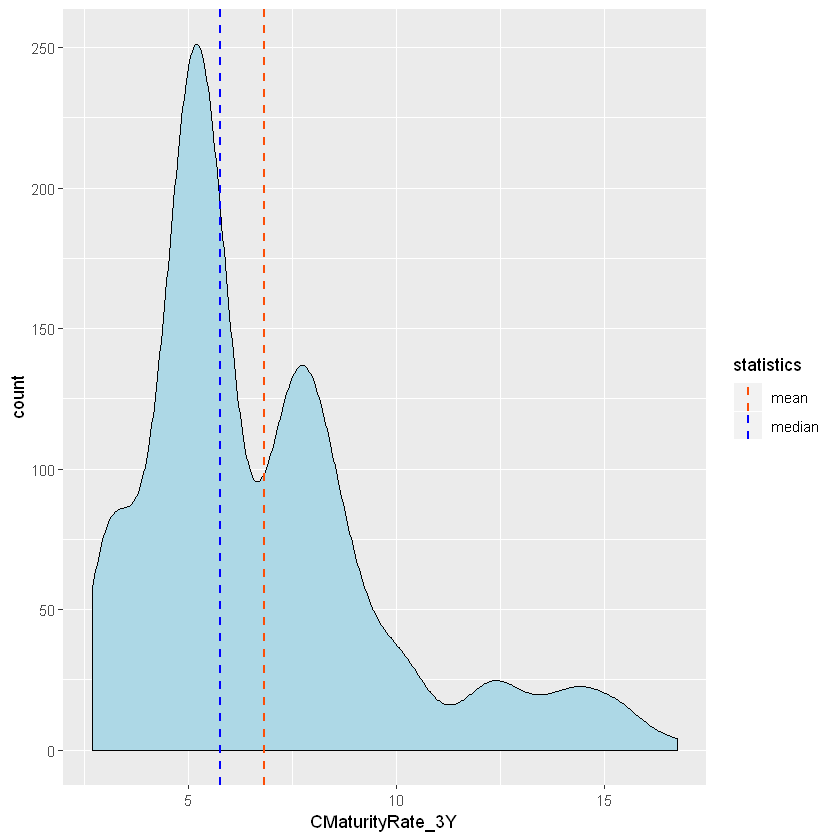

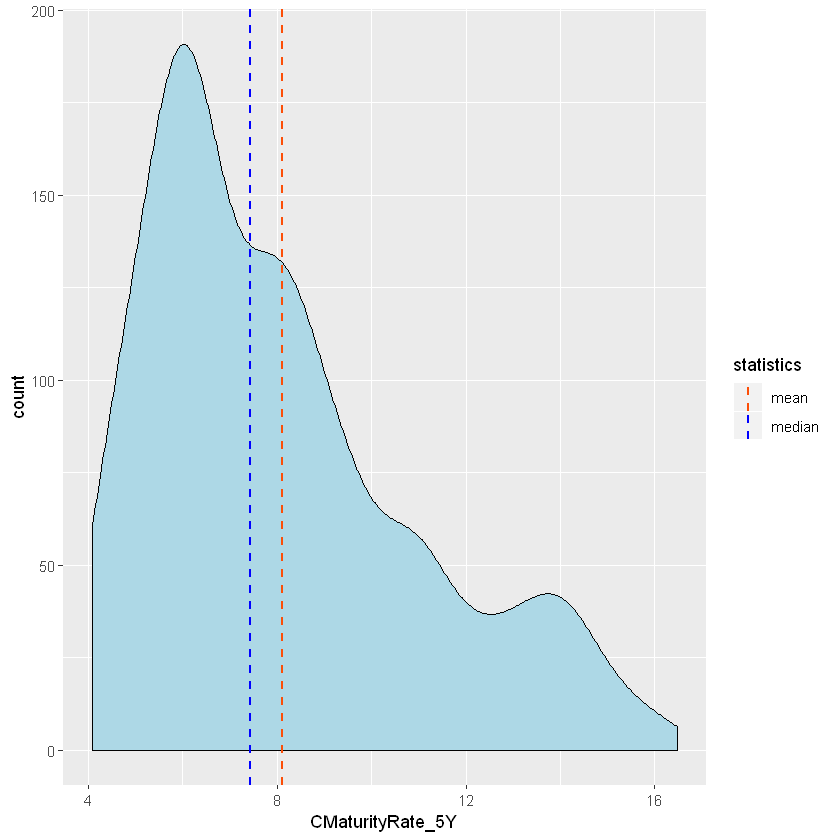

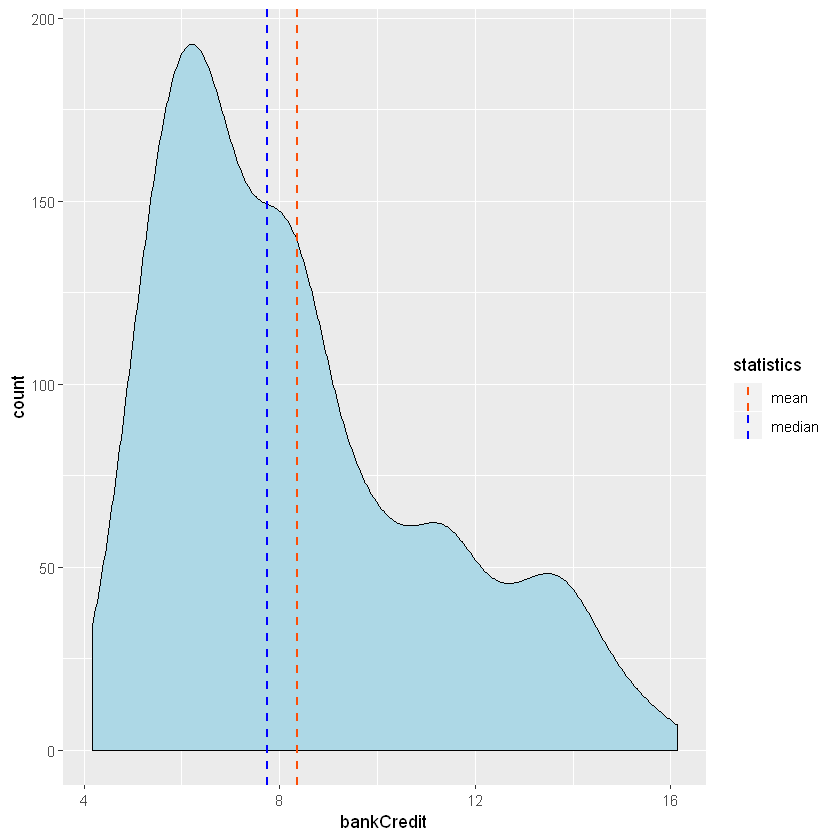

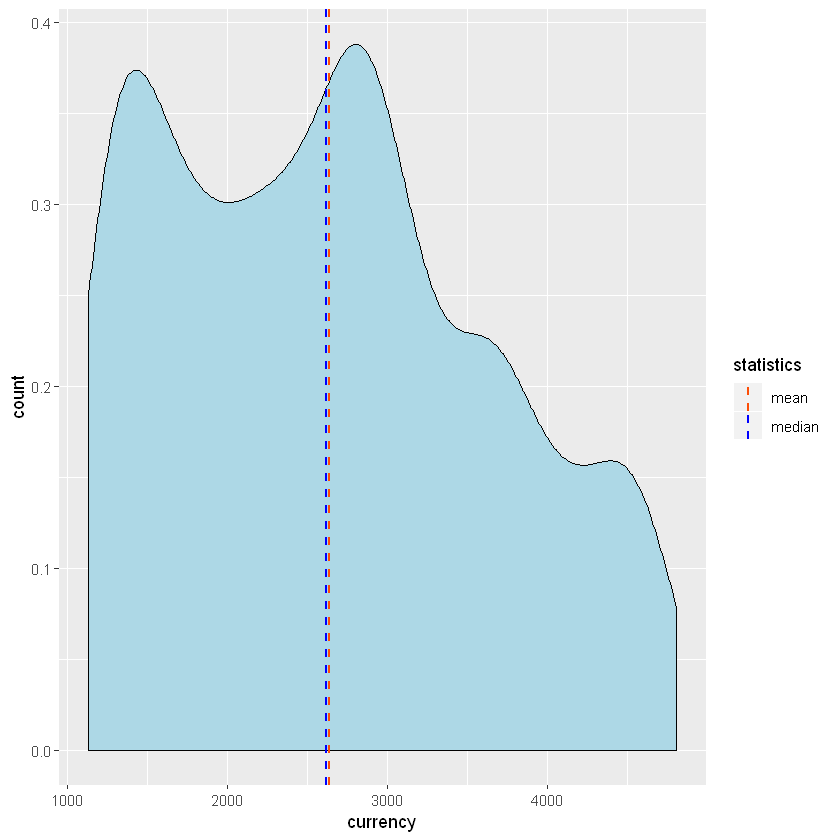

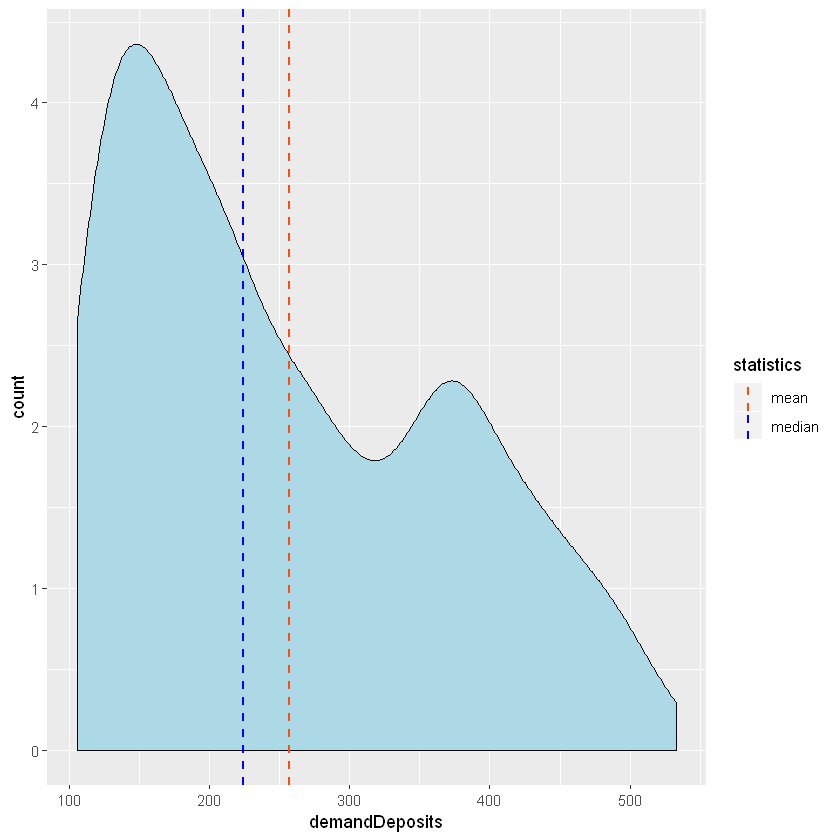

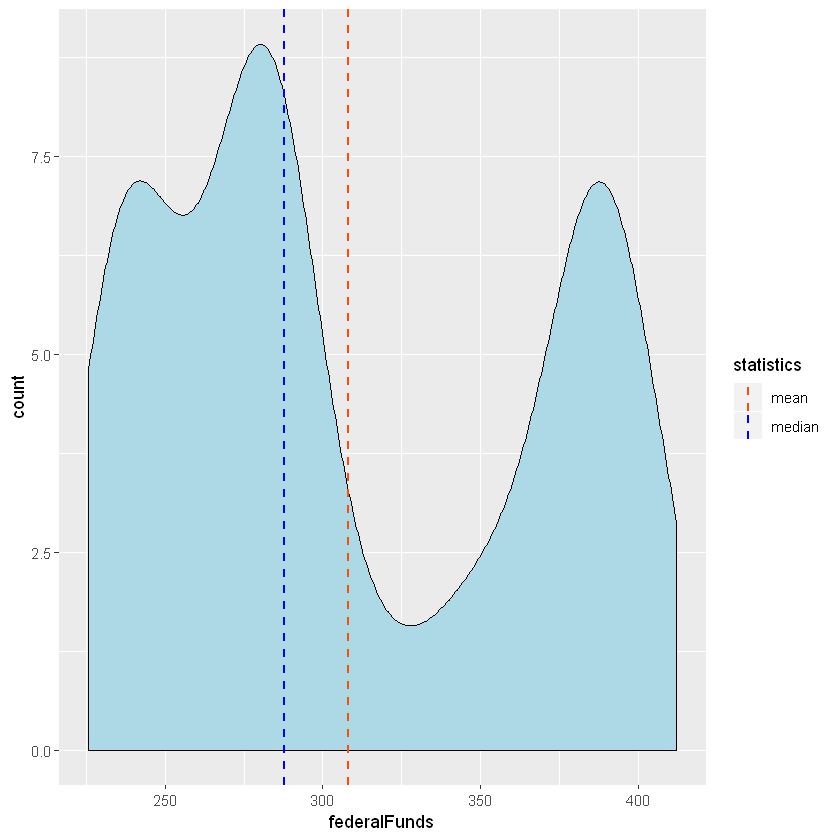

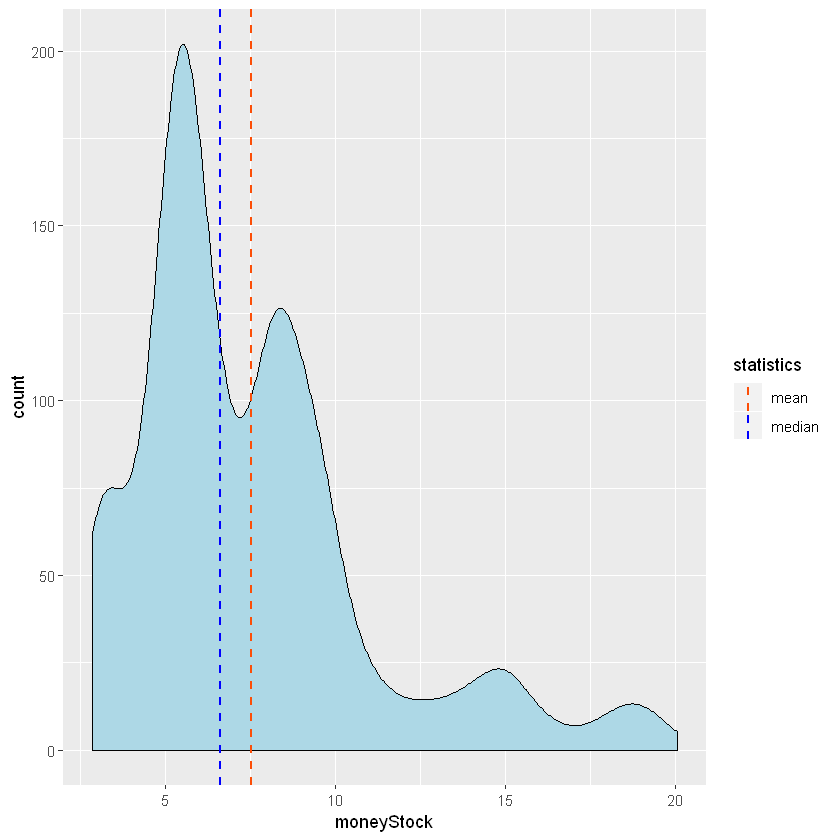

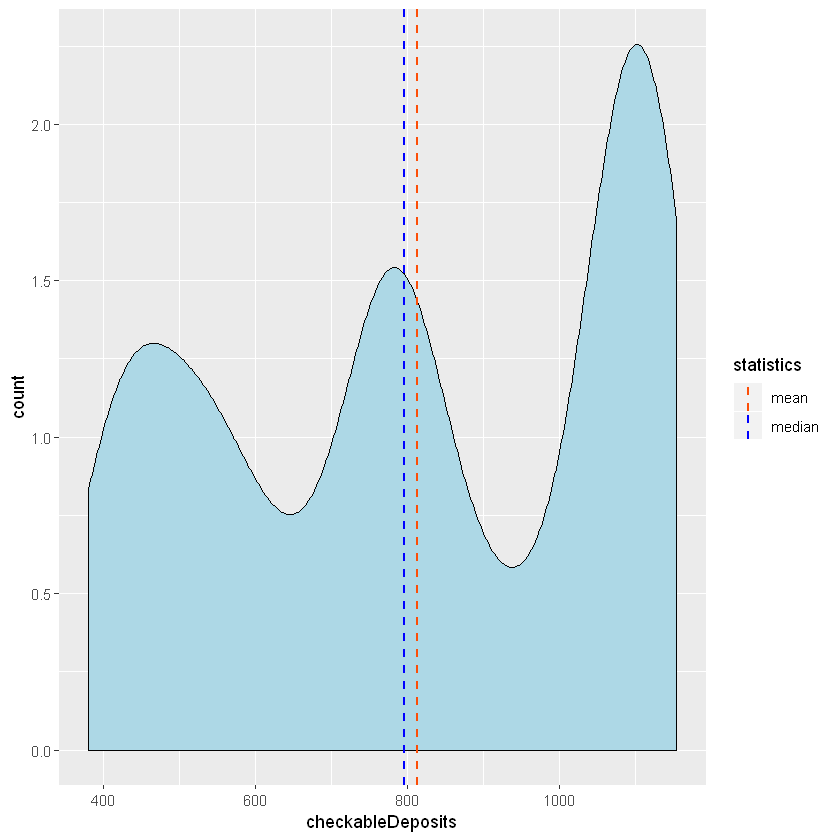

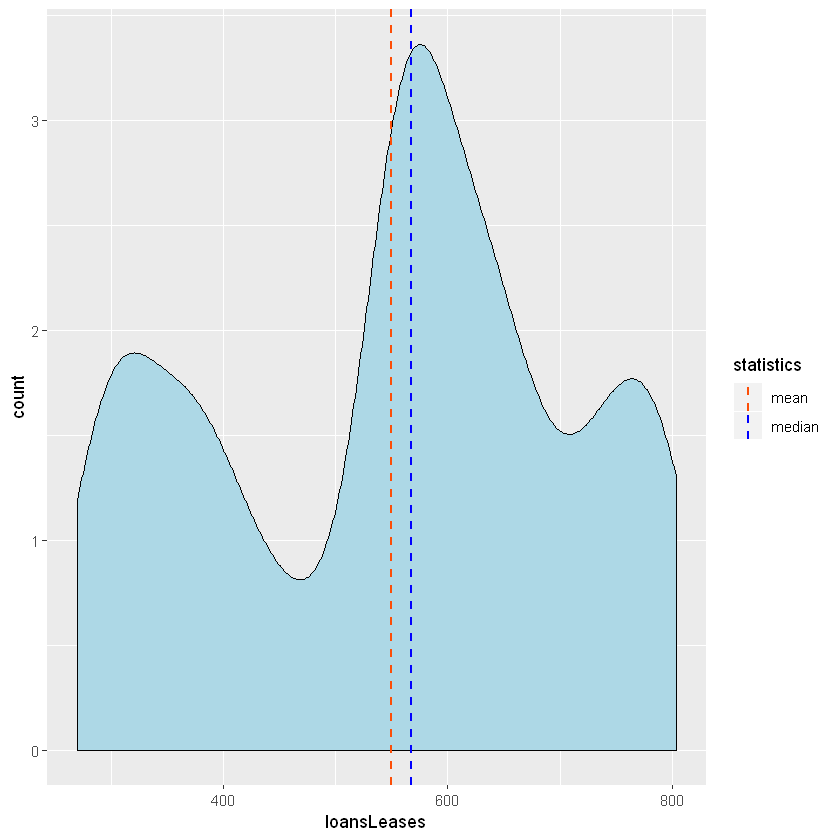

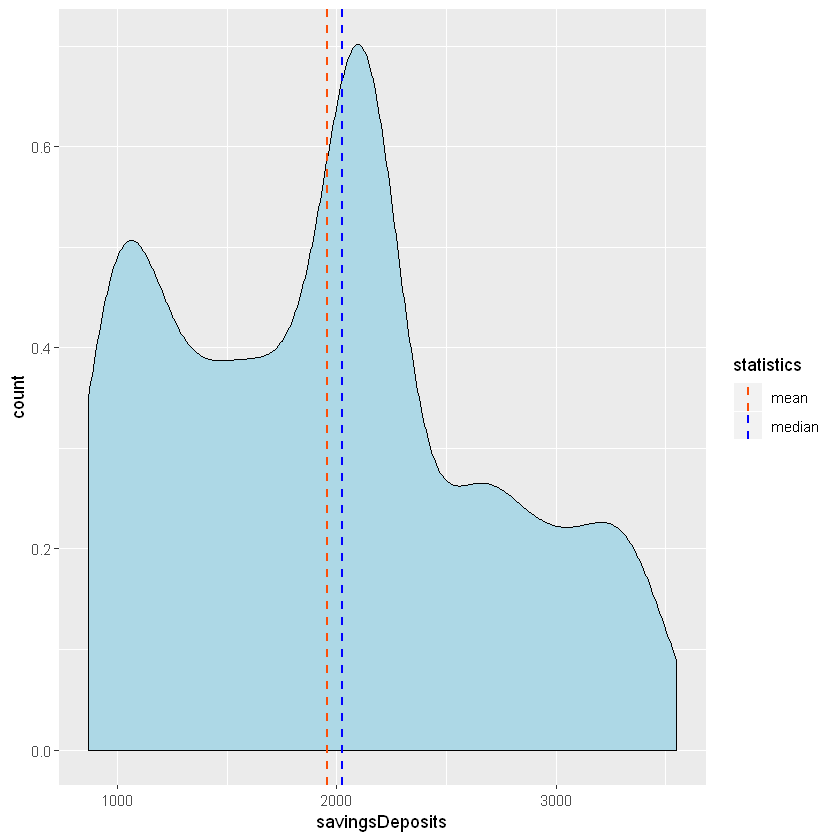

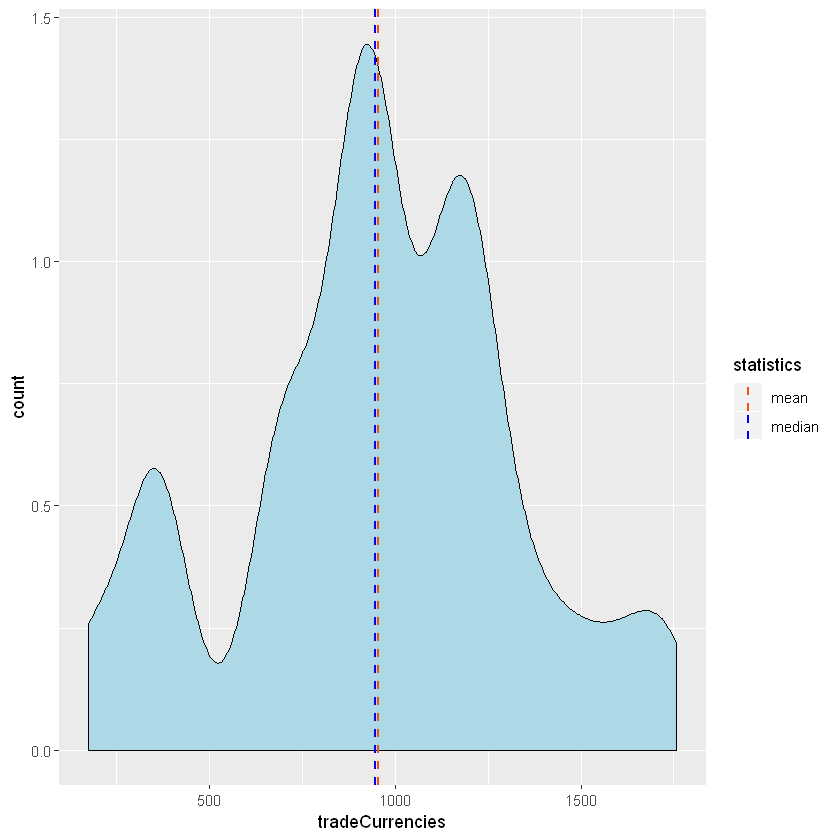

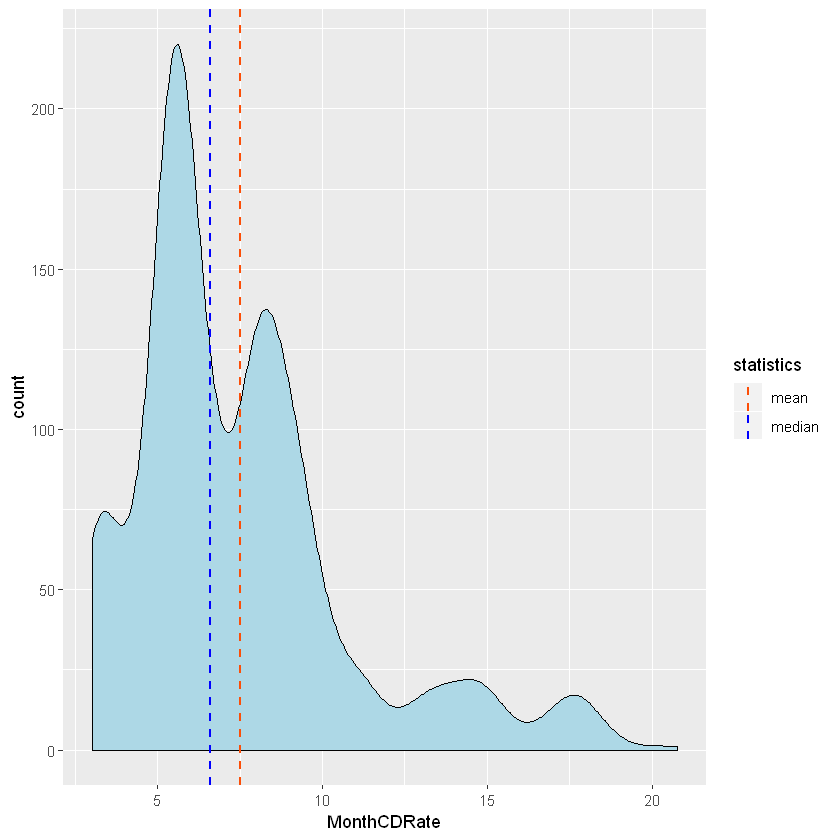

In [4]:
# Ahora pasaremos a pintar las distribuciones de cada una de las variables, para ello, utilizaremos una 
# gráfica de densidad de cada una de las variables ya que son datos reales.

# Cargamos librería para mostrar los datos.
library(ggplot2)

# Pintamos los gráficos de densidad de cada una de las variables. En naranja se muestra la media de dicha variable,
# en rojo, se muestra la mediana de dicha variable. Con la función ..count.. especificamos que queremos saber el número
# de casos en vez de la densidad.
ggplot(treasury,aes(x=CMaturityRate_1Y)) +
        geom_density(aes(y=..count..),fill='lightblue') +
        geom_vline(aes(xintercept = mean(CMaturityRate_1Y),
                       color = "mean"), 
             linetype = "dashed", size = 0.6) +
        geom_vline(aes(xintercept = median(CMaturityRate_1Y),
                       color="median"),
                  linetype = "dashed", size = 0.6 ) +
        scale_color_manual(name = "statistics",
                values = c(mean = "#FC4E07", median = "blue"))

ggplot(treasury,aes(x=CMortgageRate_30Y)) +
        geom_density(aes(y=..count..),fill='lightblue') +
        geom_vline(aes(xintercept = mean(CMortgageRate_30Y),
                       color = "mean"), 
             linetype = "dashed", size = 0.6) +
        geom_vline(aes(xintercept = median(CMortgageRate_30Y),
                       color="median"),
                  linetype = "dashed", size = 0.6 ) +
        scale_color_manual(name = "statistics", 
                values = c(mean = "#FC4E07", median = "blue"))

ggplot(treasury,aes(x=Rate_AuctionAverage_3M)) +
        geom_density(aes(y=..count..),fill='lightblue') +
        geom_vline(aes(xintercept = mean(Rate_AuctionAverage_3M),
                       color = "mean"), 
             linetype = "dashed", size = 0.6) +
        geom_vline(aes(xintercept = median(Rate_AuctionAverage_3M),
                       color="median"),
                  linetype = "dashed", size = 0.6 ) +
        scale_color_manual(name = "statistics", 
                values = c(mean = "#FC4E07", median = "blue"))

ggplot(treasury,aes(x=Rate_SecondaryMarket_3M)) + geom_density(aes(y=..count..),fill='lightblue') +
        geom_vline(aes(xintercept = mean(Rate_SecondaryMarket_3M),
                       color = "mean"), 
             linetype = "dashed", size = 0.6) +
        geom_vline(aes(xintercept = median(Rate_SecondaryMarket_3M),color="median"),
                  linetype = "dashed", size = 0.6 ) +
        scale_color_manual(name = "statistics",
                values = c(mean = "#FC4E07", median = "blue"))

ggplot(treasury,aes(x=CMaturityRate_3Y)) +
        geom_density(aes(y=..count..),fill='lightblue') +
        geom_vline(aes(xintercept = mean(CMaturityRate_3Y),
                       color = "mean"), 
             linetype = "dashed", size = 0.6) +
        geom_vline(aes(xintercept = median(CMaturityRate_3Y),
                       color="median"),
                  linetype = "dashed", size = 0.6 ) +
        scale_color_manual(name = "statistics",
                values = c(mean = "#FC4E07", median = "blue"))

ggplot(treasury,aes(x=CMaturityRate_5Y)) + 
        geom_density(aes(y=..count..),fill='lightblue') +
        geom_vline(aes(xintercept = mean(CMaturityRate_5Y),
                       color = "mean"), 
             linetype = "dashed", size = 0.6) +
        geom_vline(aes(xintercept = median(CMaturityRate_5Y),
                       color="median"),
                  linetype = "dashed", size = 0.6 ) +
        scale_color_manual(name = "statistics",
                values = c(mean = "#FC4E07", median = "blue"))

ggplot(treasury,aes(x=bankCredit)) + 
        geom_density(aes(y=..count..),fill='lightblue') +
        geom_vline(aes(xintercept = mean(bankCredit),
                       color = "mean"), 
             linetype = "dashed", size = 0.6) +
        geom_vline(aes(xintercept = median(bankCredit),
                       color="median"),
                  linetype = "dashed", size = 0.6 ) +
        scale_color_manual(name = "statistics", 
                values = c(mean = "#FC4E07", median = "blue"))

ggplot(treasury,aes(x=currency)) + 
        geom_density(aes(y=..count..),fill='lightblue') +
        geom_vline(aes(xintercept = mean(currency),
                       color = "mean"), 
             linetype = "dashed", size = 0.6) +
        geom_vline(aes(xintercept = median(currency),
                       color="median"),
                  linetype = "dashed", size = 0.6 ) +
        scale_color_manual(name = "statistics",
                values = c(mean = "#FC4E07", median = "blue"))

ggplot(treasury,aes(x=demandDeposits)) +
        geom_density(aes(y=..count..),fill='lightblue') +
        geom_vline(aes(xintercept = mean(demandDeposits),
                       color = "mean"), 
             linetype = "dashed", size = 0.6) +
        geom_vline(aes(xintercept = median(demandDeposits),
                       color="median"),
                  linetype = "dashed", size = 0.6 ) +
        scale_color_manual(name = "statistics",
                values = c(mean = "#FC4E07", median = "blue"))

ggplot(treasury,aes(x=federalFunds)) + 
        geom_density(aes(y=..count..),fill='lightblue') +
        geom_vline(aes(xintercept = mean(federalFunds),
                       color = "mean"), 
             linetype = "dashed", size = 0.6) +
        geom_vline(aes(xintercept = median(federalFunds),
                       color="median"),
                  linetype = "dashed", size = 0.6 ) +
        scale_color_manual(name = "statistics", 
                values = c(mean = "#FC4E07", median = "blue"))

ggplot(treasury,aes(x=moneyStock)) + 
        geom_density(aes(y=..count..),fill='lightblue') +
        geom_vline(aes(xintercept = mean(moneyStock),
                       color = "mean"), 
             linetype = "dashed", size = 0.6) +
        geom_vline(aes(xintercept = median(moneyStock),
                       color="median"),
                  linetype = "dashed", size = 0.6 ) +
        scale_color_manual(name = "statistics", 
                values = c(mean = "#FC4E07", median = "blue"))

ggplot(treasury,aes(x=checkableDeposits)) + 
        geom_density(aes(y=..count..),fill='lightblue') +
        geom_vline(aes(xintercept = mean(checkableDeposits),
                       color = "mean"), 
             linetype = "dashed", size = 0.6) +
        geom_vline(aes(xintercept = median(checkableDeposits),
                       color="median"),
                  linetype = "dashed", size = 0.6 ) +
        scale_color_manual(name = "statistics", 
                values = c(mean = "#FC4E07", median = "blue"))

ggplot(treasury,aes(x=loansLeases)) + 
        geom_density(aes(y=..count..),fill='lightblue') +
        geom_vline(aes(xintercept = mean(loansLeases),
                       color = "mean"), 
             linetype = "dashed", size = 0.6) +
        geom_vline(aes(xintercept = median(loansLeases),
                       color="median"),
                  linetype = "dashed", size = 0.6 ) +
        scale_color_manual(name = "statistics", 
                values = c(mean = "#FC4E07", median = "blue"))

ggplot(treasury,aes(x=savingsDeposits)) + 
        geom_density(aes(y=..count..),fill='lightblue') +
        geom_vline(aes(xintercept = mean(savingsDeposits),
                       color = "mean"), 
             linetype = "dashed", size = 0.6) +
        geom_vline(aes(xintercept = median(savingsDeposits),
                       color="median"),
                  linetype = "dashed", size = 0.6 ) +
        scale_color_manual(name = "statistics", 
                values = c(mean = "#FC4E07", median = "blue"))

ggplot(treasury,aes(x=tradeCurrencies)) + 
        geom_density(aes(y=..count..),fill='lightblue') +
        geom_vline(aes(xintercept = mean(tradeCurrencies),
                       color = "mean"), 
             linetype = "dashed", size = 0.6) +
        geom_vline(aes(xintercept = median(tradeCurrencies),
                       color="median"),
                  linetype = "dashed", size = 0.6 ) +
        scale_color_manual(name = "statistics", 
                values = c(mean = "#FC4E07", median = "blue"))

ggplot(treasury,aes(x=MonthCDRate)) + 
        geom_density(aes(y=..count..),fill='lightblue') +
        geom_vline(aes(xintercept = mean(MonthCDRate),
                       color = "mean"), 
             linetype = "dashed", size = 0.6) +
        geom_vline(aes(xintercept = median(MonthCDRate),
                       color="median"),
                  linetype = "dashed", size = 0.6 ) +
        scale_color_manual(name = "statistics", 
                values = c(mean = "#FC4E07", median = "blue"))


Según la información que se puede ver en las gráficas, ninguna de las variables cuenta con una distribución normal; así que más adelante habrá que probar a transformar dichas variables para intentar que se parezcan más a una distribución normal, por ejemplo las variables donde la mayoría de los datos se encuentran al principio pueden mejorar su distribución con una transformación logarítmica. 

Además según lo visto gracias a la información que nos aporta la función *summary()*, ninguna de las variables contiene *NAs*, así que no es necesario hacer imputación de valores o borrar ningún dato.

Además de los gráficos de densidad, utilizaremos los boxplots para ver si existen outliers dentro de los datos. También probaremos a transformar los datos para ver si mejora su distribución.

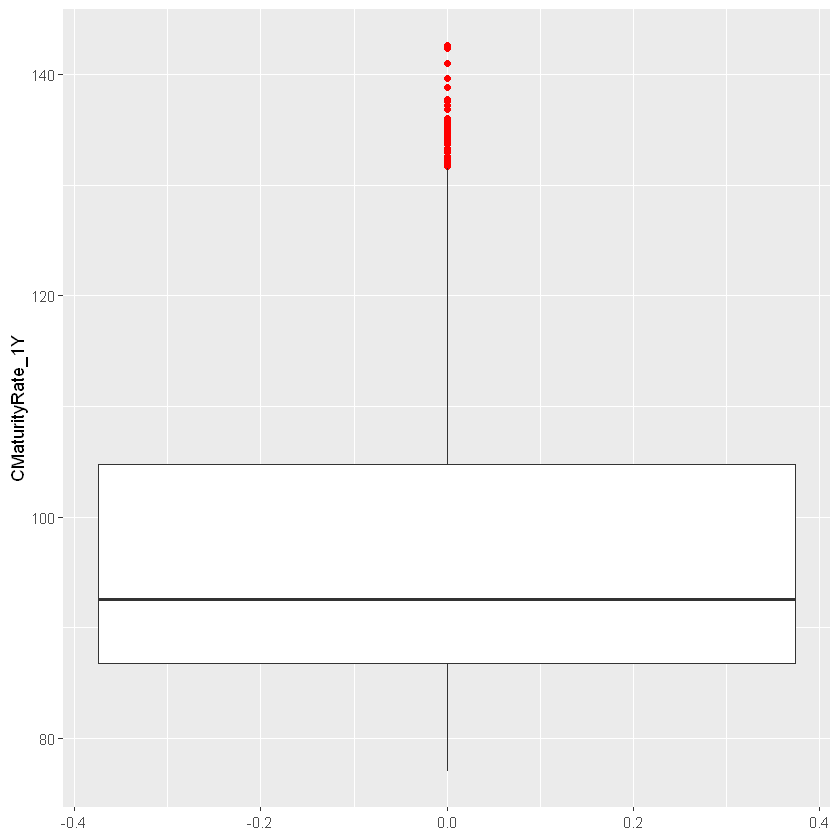

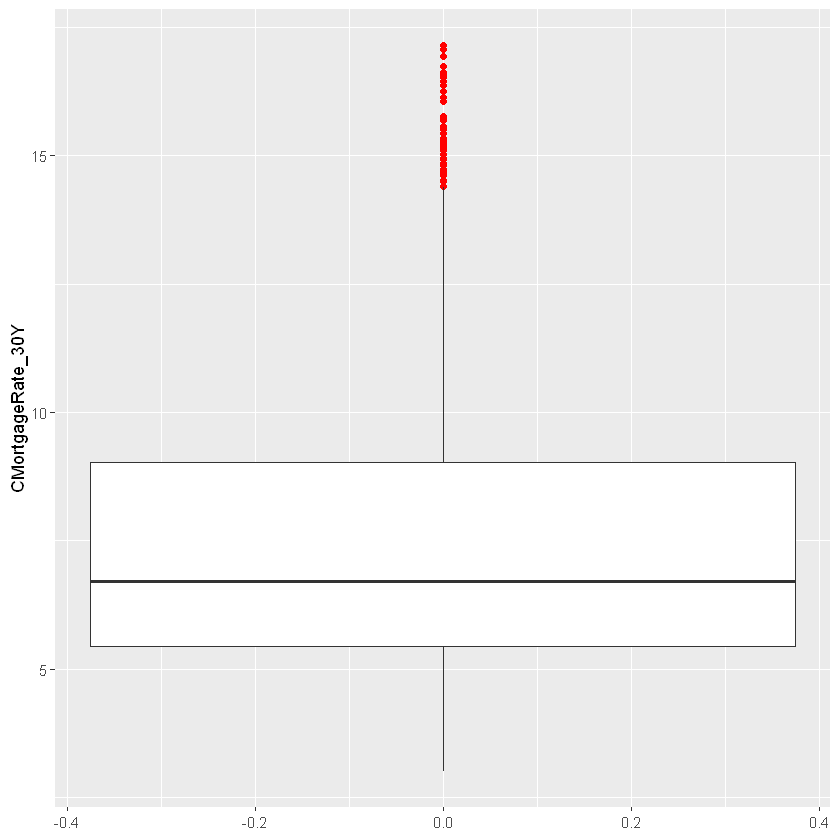

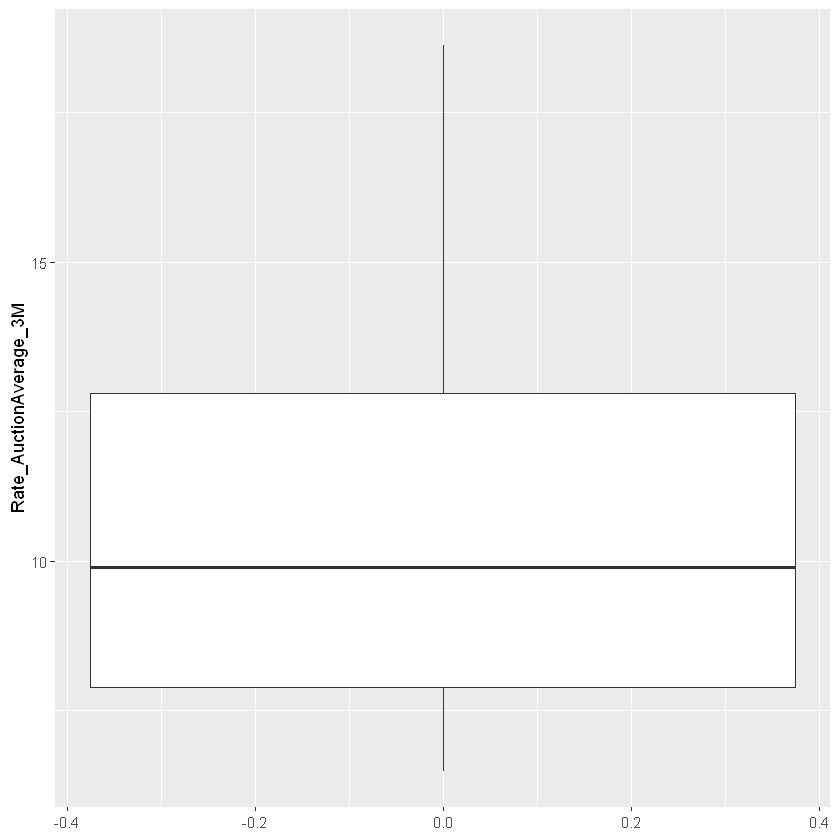

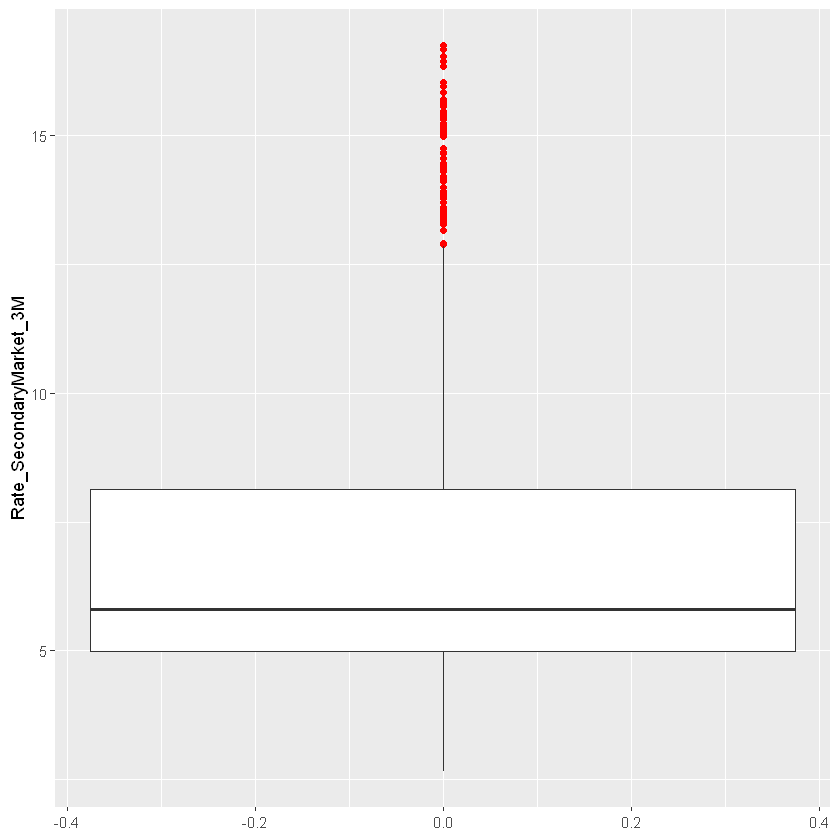

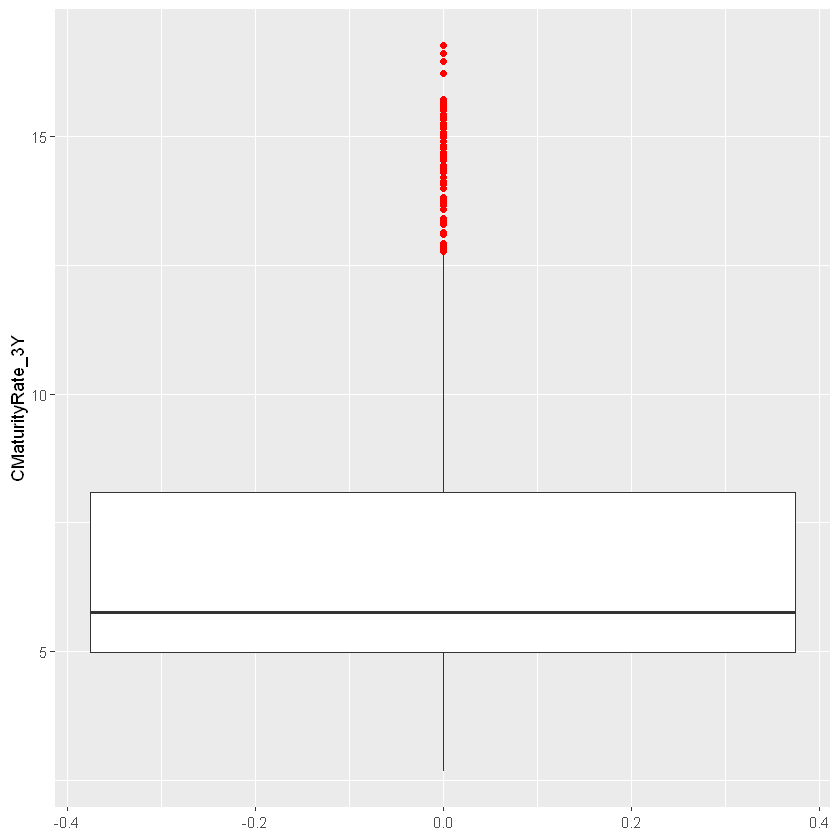

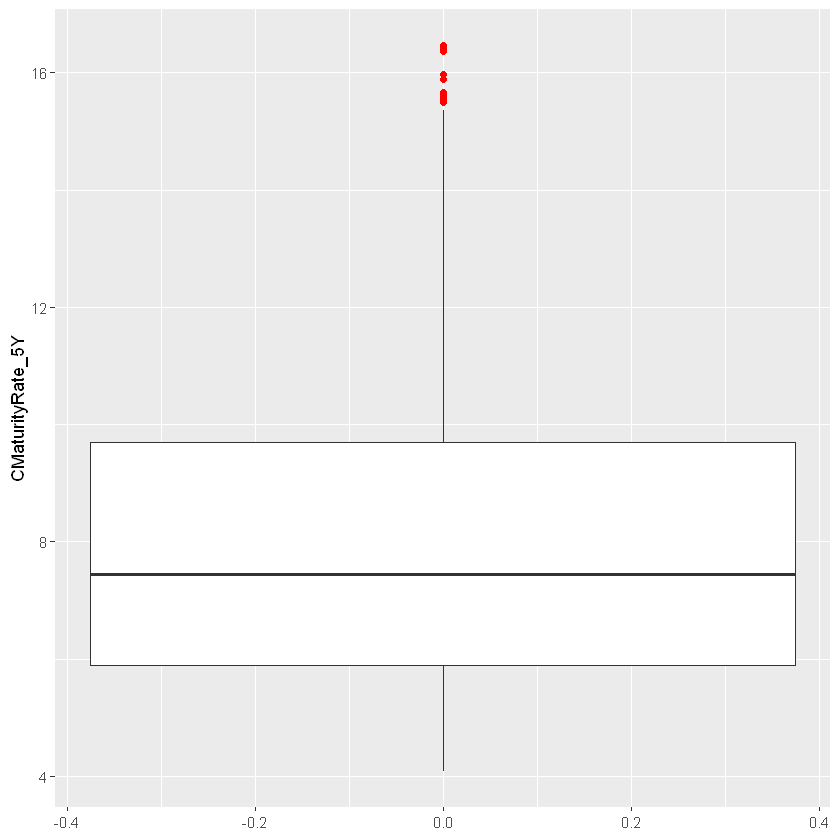

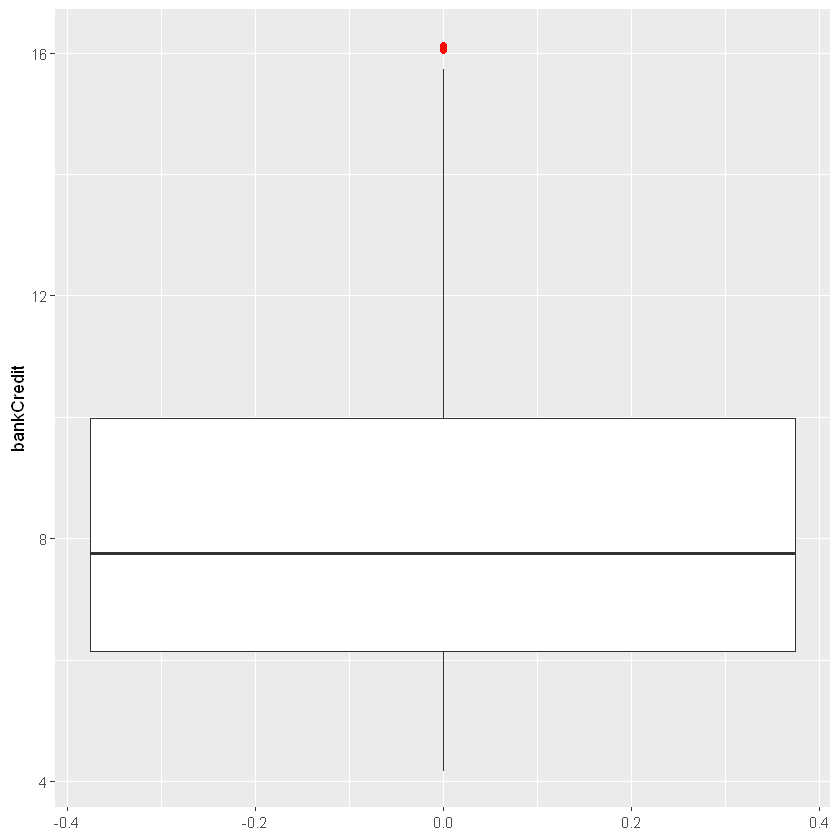

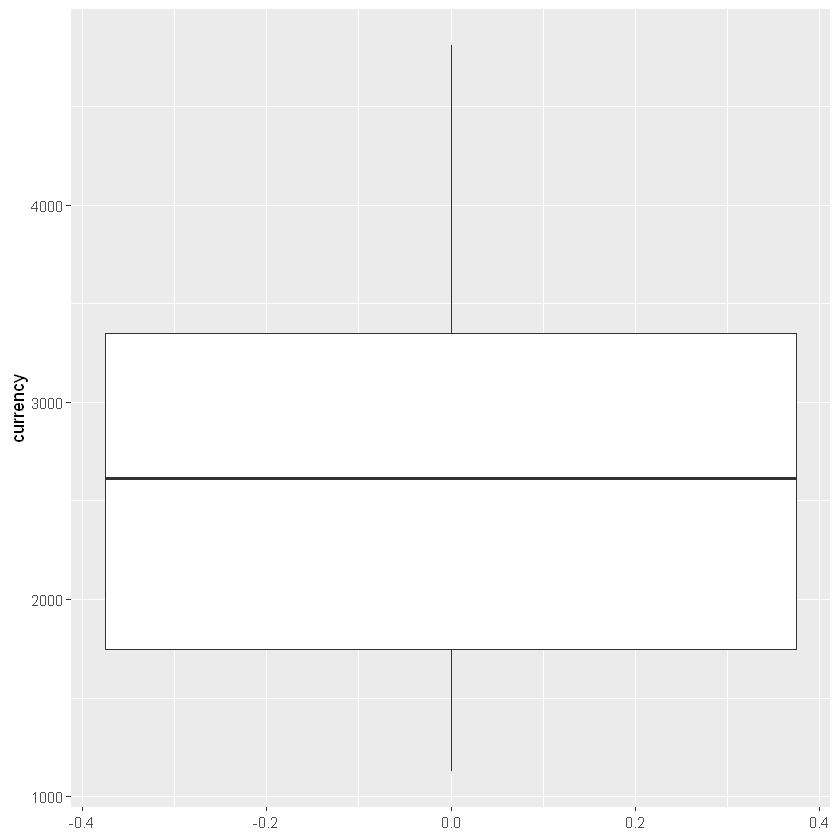

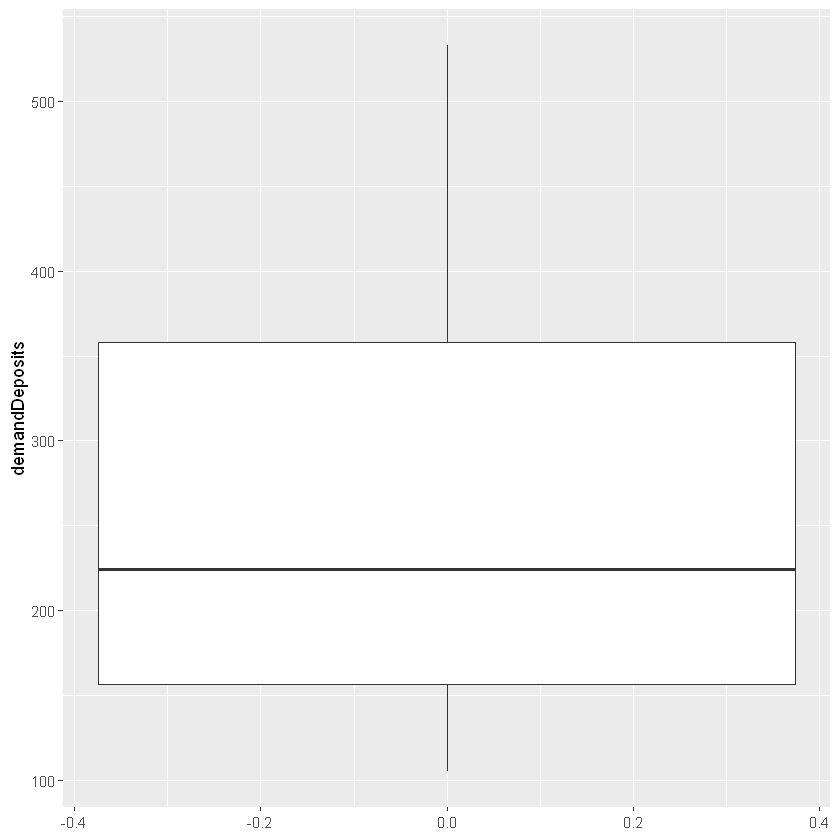

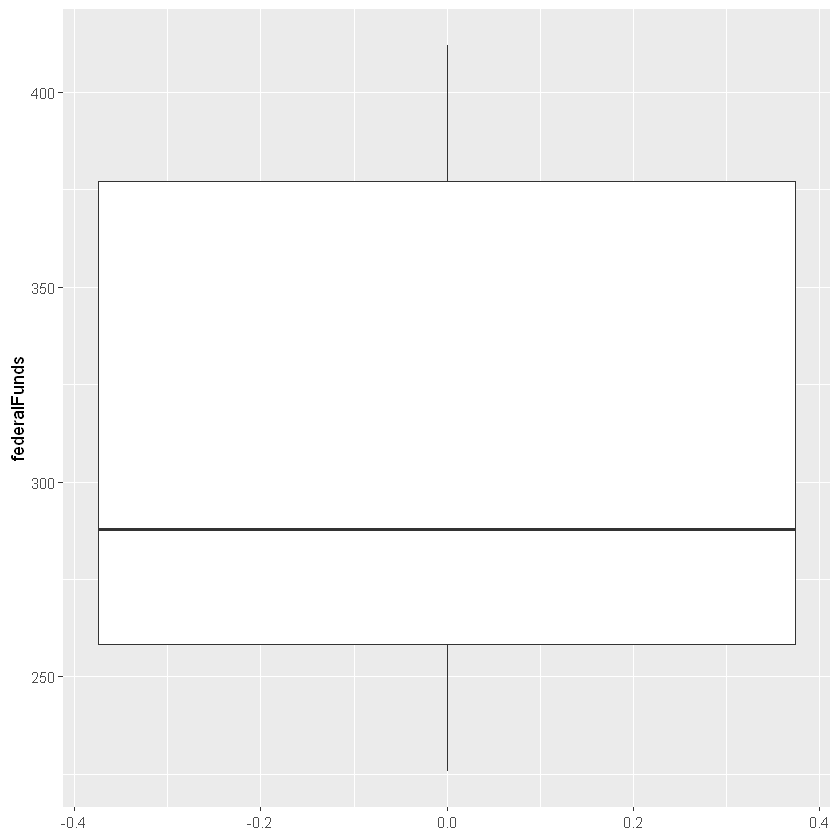

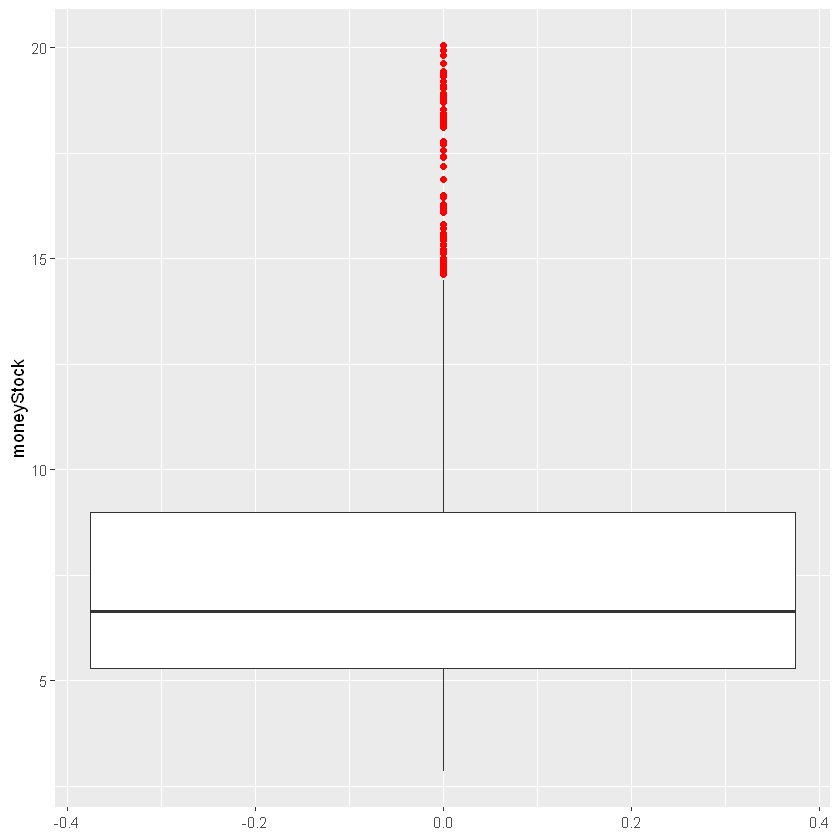

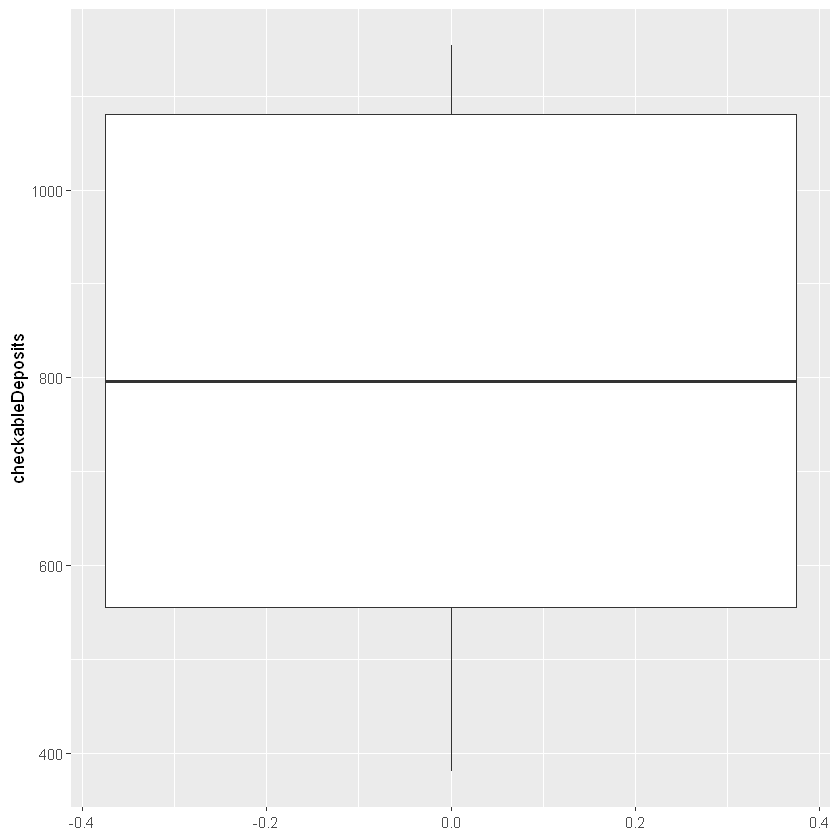

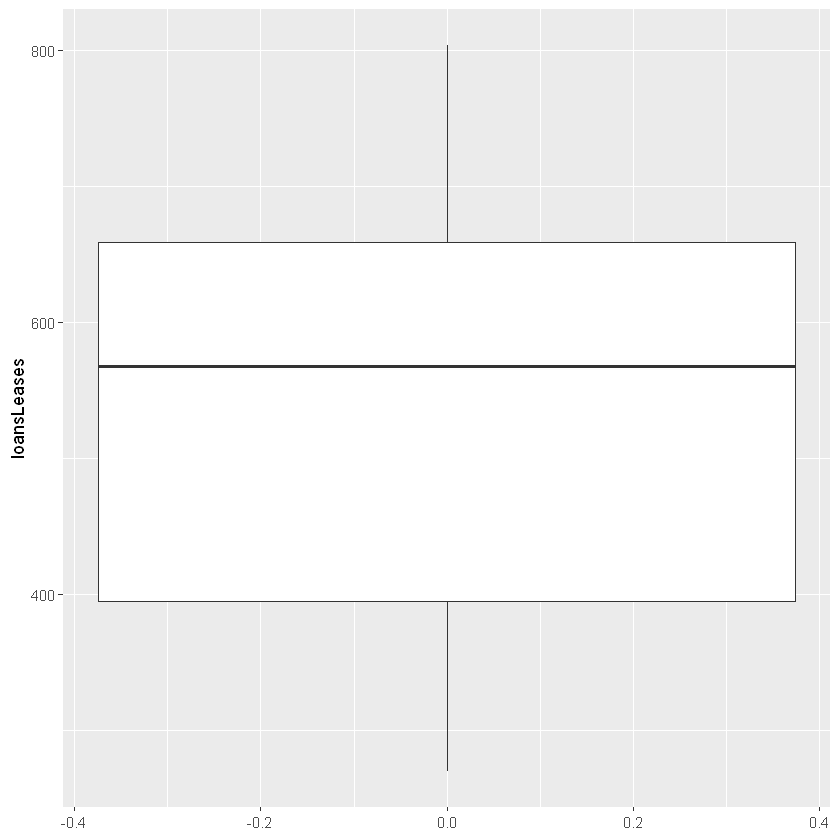

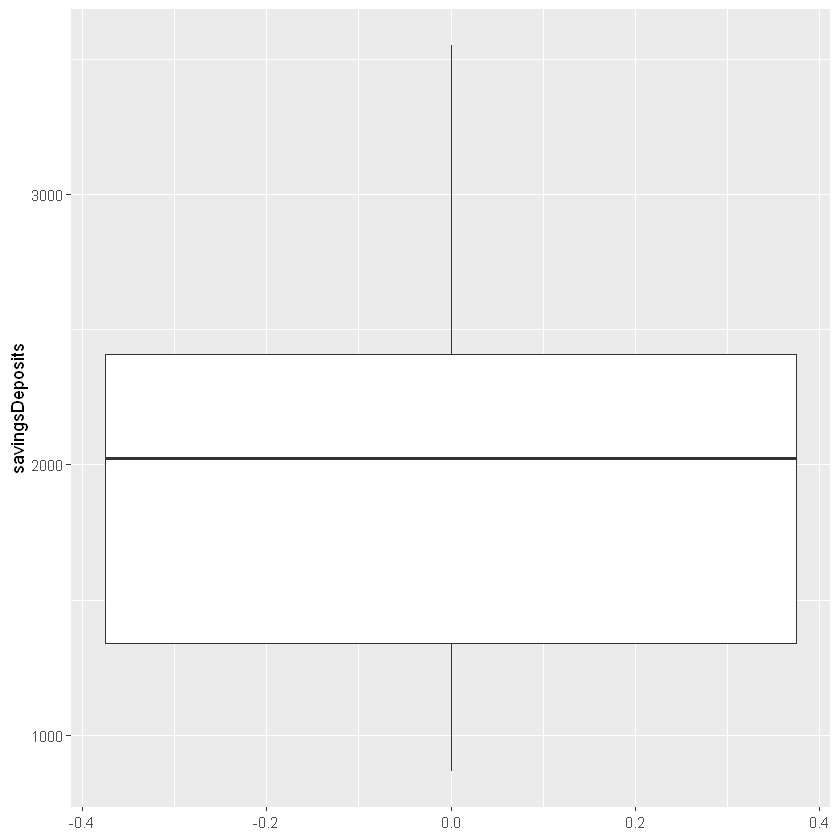

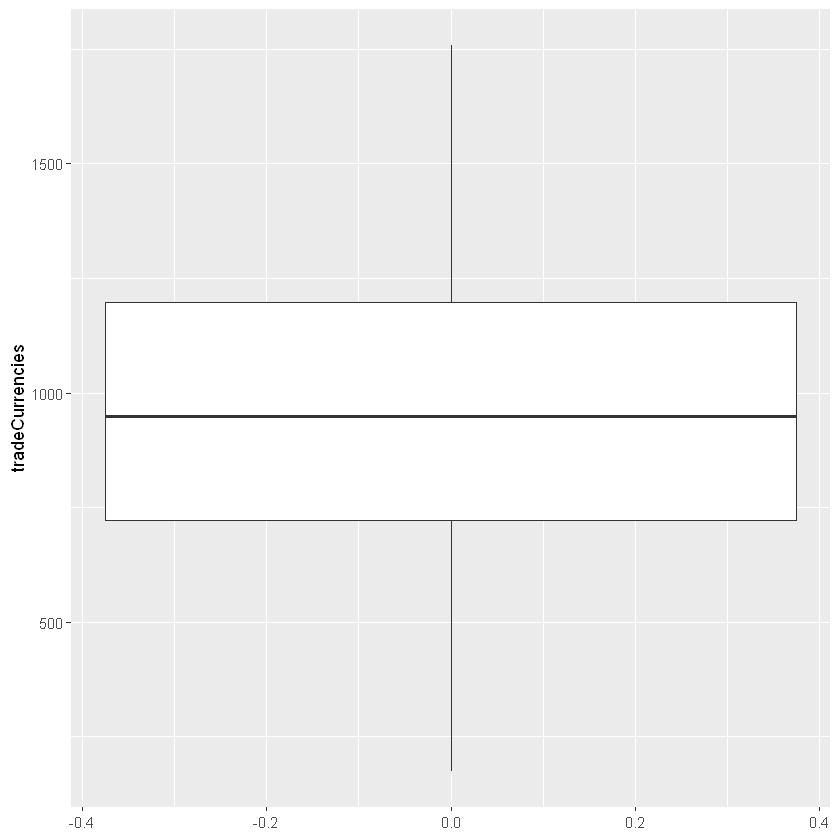

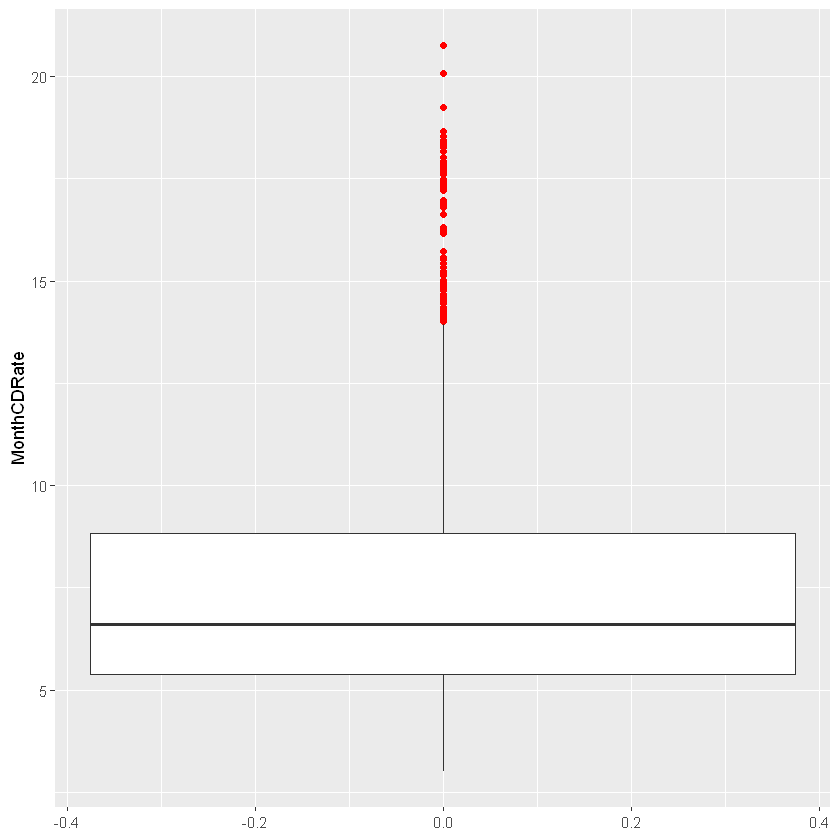

In [5]:
# Pintamos los boxplots. En rojo se muestran ( si es que hay) los outliers.
ggplot(treasury, aes(y=CMaturityRate_1Y)) +
    geom_boxplot(outlier.color = "red")
ggplot(treasury, aes(y=CMortgageRate_30Y)) +
    geom_boxplot(outlier.color = "red")
ggplot(treasury, aes(y=Rate_AuctionAverage_3M)) +
    geom_boxplot(outlier.color = "red")
ggplot(treasury, aes(y=Rate_SecondaryMarket_3M)) +
    geom_boxplot(outlier.color = "red")
ggplot(treasury, aes(y=CMaturityRate_3Y)) +
    geom_boxplot(outlier.color = "red")
ggplot(treasury, aes(y=CMaturityRate_5Y)) +
    geom_boxplot(outlier.color = "red")
ggplot(treasury, aes(y=bankCredit)) +
    geom_boxplot(outlier.color = "red")
ggplot(treasury, aes(y=currency)) +
    geom_boxplot(outlier.color = "red")
ggplot(treasury, aes(y=demandDeposits)) +
    geom_boxplot(outlier.color = "red")
ggplot(treasury, aes(y=federalFunds)) +
    geom_boxplot(outlier.color = "red")
ggplot(treasury, aes(y=moneyStock)) +
    geom_boxplot(outlier.color = "red")
ggplot(treasury, aes(y=checkableDeposits)) +
    geom_boxplot(outlier.color = "red")
ggplot(treasury, aes(y=loansLeases)) +
    geom_boxplot(outlier.color = "red")
ggplot(treasury, aes(y=savingsDeposits)) +
    geom_boxplot(outlier.color = "red")
ggplot(treasury, aes(y=tradeCurrencies)) +
    geom_boxplot(outlier.color = "red")
ggplot(treasury, aes(y=MonthCDRate)) +
    geom_boxplot(outlier.color = "red")

Como se puede ver en los resultados gráficos anteriores, las variables CMaturityRate_1Y, CMortgageRate_30Y, Rate_SecondaryMarket_3M, CMaturityRate_3Y, CMaturityRate_5Y, bankCredit, moneyStock y MonthCDRate contienen outliers. En principio no los eliminaremos ya que pueden ser casos extremos que nos aporten cierta información en el modelo.

Por último, dibujaremos las correlaciones entre las variables.

### Estudio correlaciones y transformaciones de variables

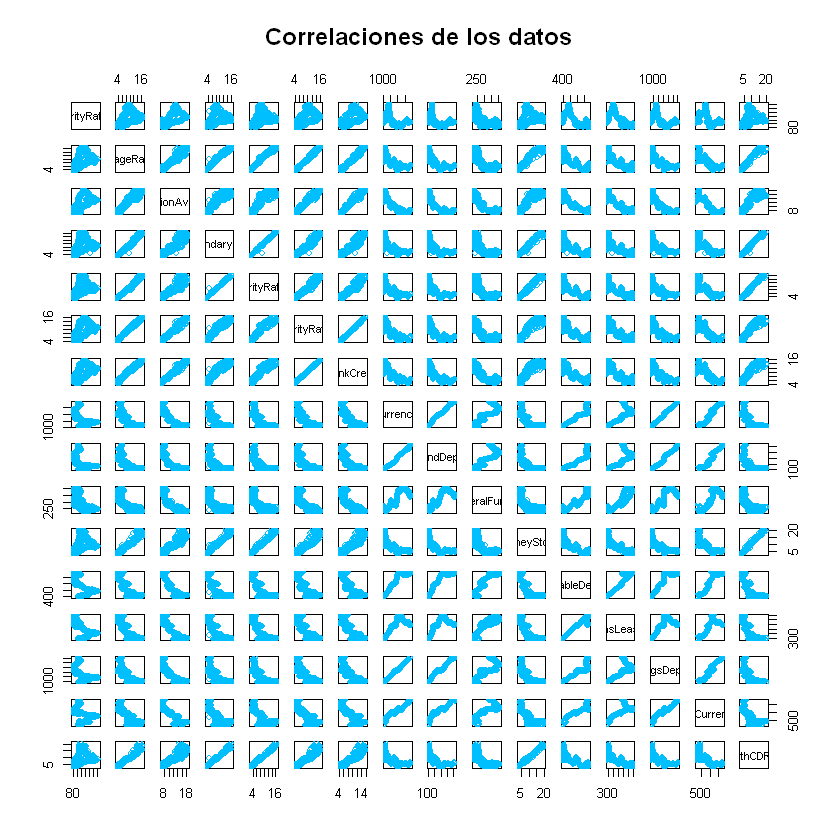

In [6]:
# Dibujamos las correlaciones entre las variables.
pairs(treasury,col="deepskyblue", main="Correlaciones de los datos")

In [7]:
cor(treasury)

,CMaturityRate_1Y,CMortgageRate_30Y,Rate_AuctionAverage_3M,Rate_SecondaryMarket_3M,CMaturityRate_3Y,CMaturityRate_5Y,bankCredit,currency,demandDeposits,federalFunds,moneyStock,checkableDeposits,loansLeases,savingsDeposits,tradeCurrencies,MonthCDRate
CMaturityRate_1Y,1.0000000,0.5289173,0.6500870,0.4788677,0.4818779,0.6023984,0.6250722,-0.5741093,-0.5515314,-0.6408934,0.4560397,-0.6838618,-0.7161397,-0.5672793,-0.4763829,0.4507399
CMortgageRate_30Y,0.5289173,1.0000000,0.9367248,0.9864352,0.9874777,0.9849371,0.9668119,-0.7523409,-0.7174992,-0.7367525,0.9692879,-0.8378256,-0.8471908,-0.7420812,-0.8255995,0.9772895
Rate_AuctionAverage_3M,0.6500870,0.9367248,1.0000000,0.8997102,0.8986080,0.9717959,0.9806363,-0.8729493,-0.8396140,-0.8545196,0.8893533,-0.9201255,-0.8927273,-0.8674640,-0.8941019,0.8868518
Rate_SecondaryMarket_3M,0.4788677,0.9864352,0.8997102,1.0000000,0.9977408,0.9527171,0.9287190,-0.7235480,-0.6917304,-0.7133572,0.9848922,-0.8185177,-0.8343992,-0.7119274,-0.8078303,0.9903362
CMaturityRate_3Y,0.4818779,0.9874777,0.8986080,0.9977408,1.0000000,0.9536684,0.9295766,-0.7247399,-0.6932254,-0.7152727,0.9861269,-0.8198067,-0.8354147,-0.7130192,-0.8071159,0.9917367
CMaturityRate_5Y,0.6023984,0.9849371,0.9717959,0.9527171,0.9536684,1.0000000,0.9955387,-0.8044921,-0.7703285,-0.7914913,0.9300853,-0.8705364,-0.8622077,-0.7958332,-0.8499892,0.9378451
bankCredit,0.6250722,0.9668119,0.9806363,0.9287190,0.9295766,0.9955387,1.0000000,-0.8338960,-0.7997921,-0.8168239,0.9040410,-0.8837260,-0.8622840,-0.8273161,-0.8651072,0.9106219
currency,-0.5741093,-0.7523409,-0.8729493,-0.7235480,-0.7247399,-0.8044921,-0.8338960,1.0000000,0.9912600,0.8881952,-0.7189738,0.9340624,0.8049866,0.9977185,0.9531331,-0.7070180
demandDeposits,-0.5515314,-0.7174992,-0.8396140,-0.6917304,-0.6932254,-0.7703285,-0.7997921,0.9912600,1.0000000,0.9059379,-0.6899164,0.9252762,0.7844607,0.9826211,0.9319984,-0.6783867
federalFunds,-0.6408934,-0.7367525,-0.8545196,-0.7133572,-0.7152727,-0.7914913,-0.8168239,0.8881952,0.9059379,1.0000000,-0.7072023,0.9374450,0.8731687,0.8663811,0.8259606,-0.7021663


Según lo que se puede ver en la gráfica y la tabla anterior, muchas de las variables que tenemos pueden estar relacionadas, como *Rate_SecondaryMarket_3M* con *CMaturityRate_3Y* o *CMaturityRate_5Y* con *bankCredit*. También se puede ver como algunas variables, como por ejemplo *CMortgageRato_30Y*, *Rate_SecondaryMarket_3M*, *CMaturityRate_3Y* y *moneyStock* tienen una relación lineal con respecto a la variable que tenemos que predecir, esto puede ser interesante a la hora de crear un modelo lineal con dichas variables.

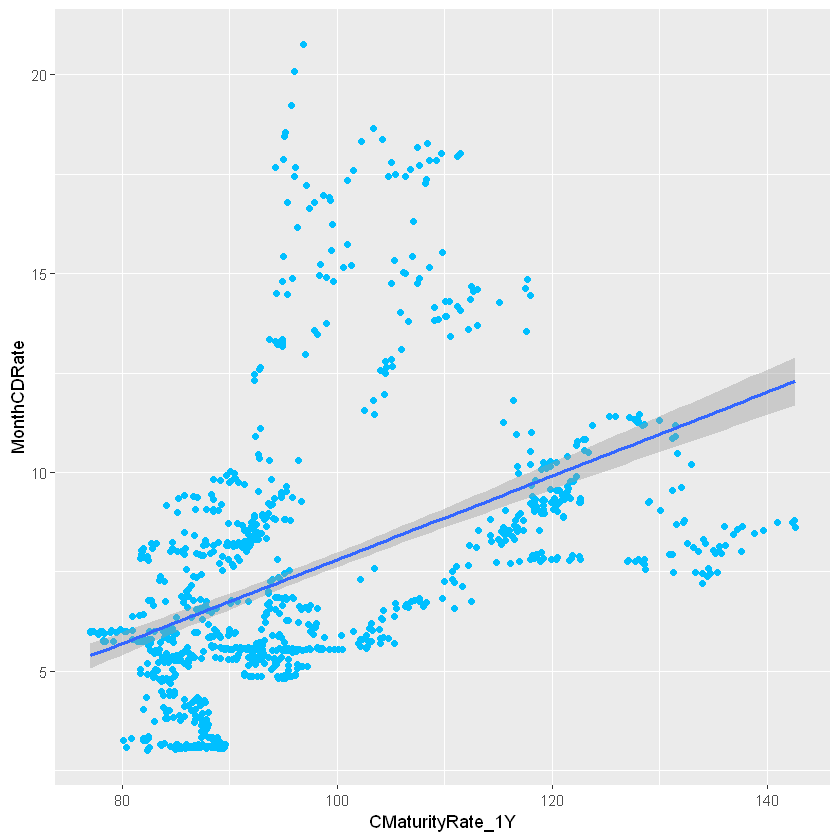

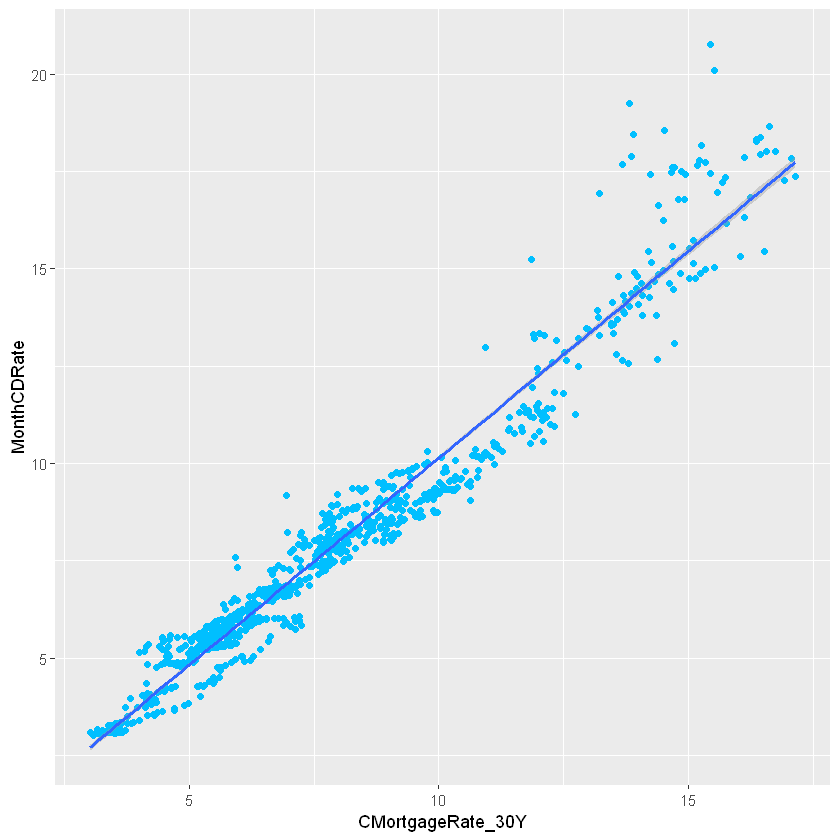

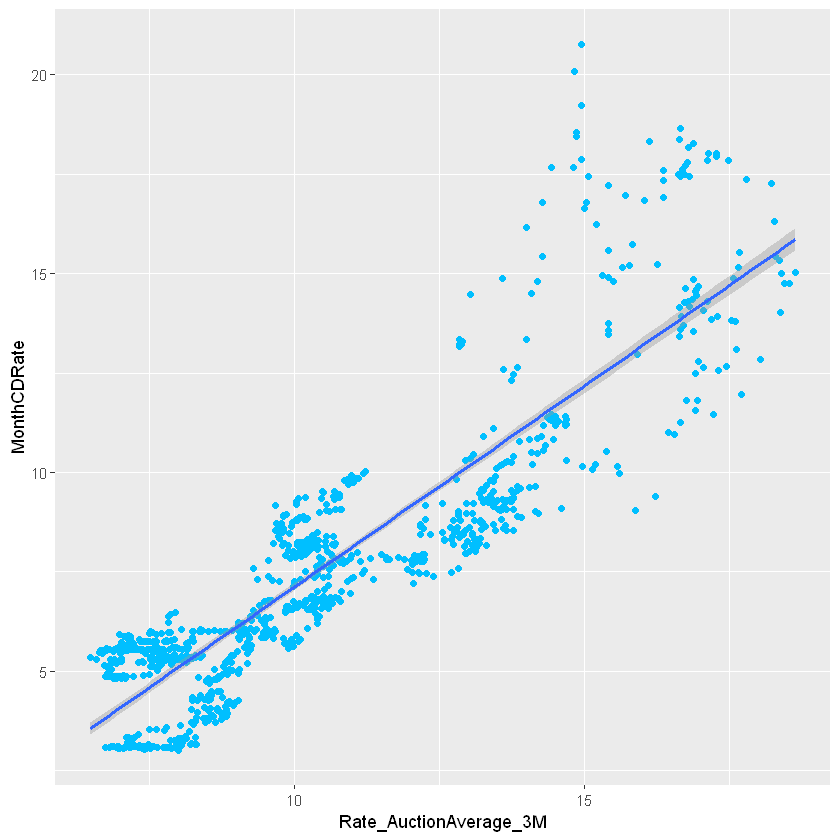

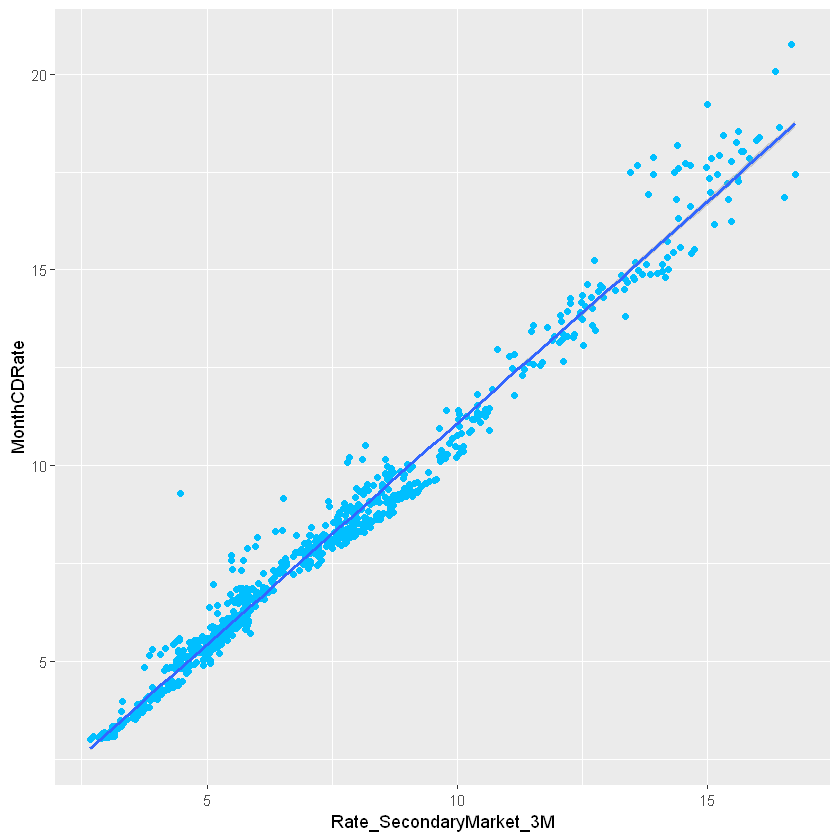

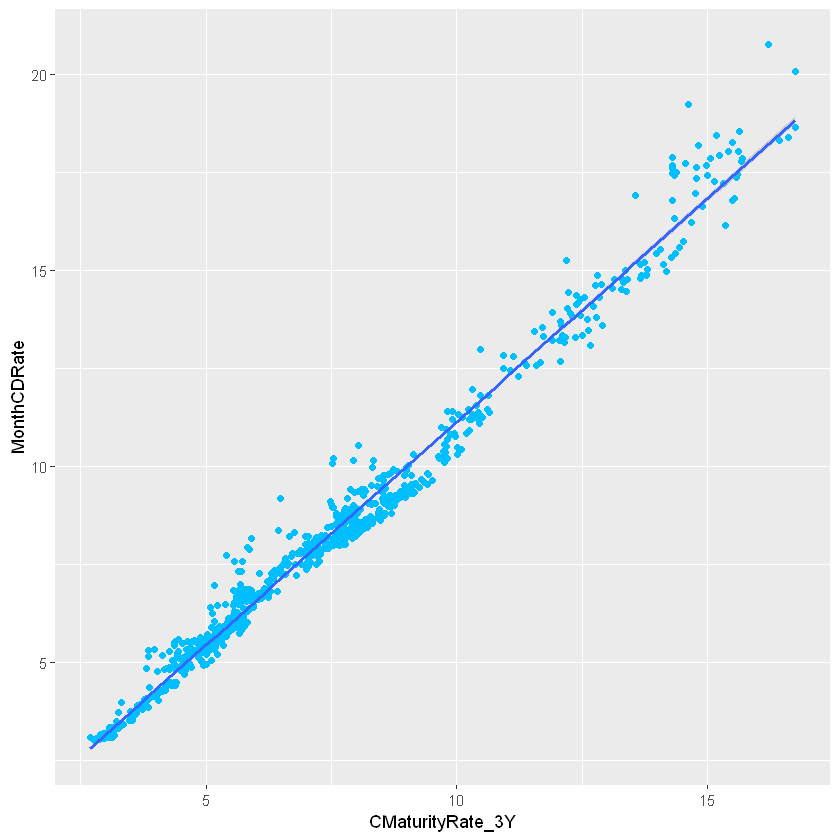

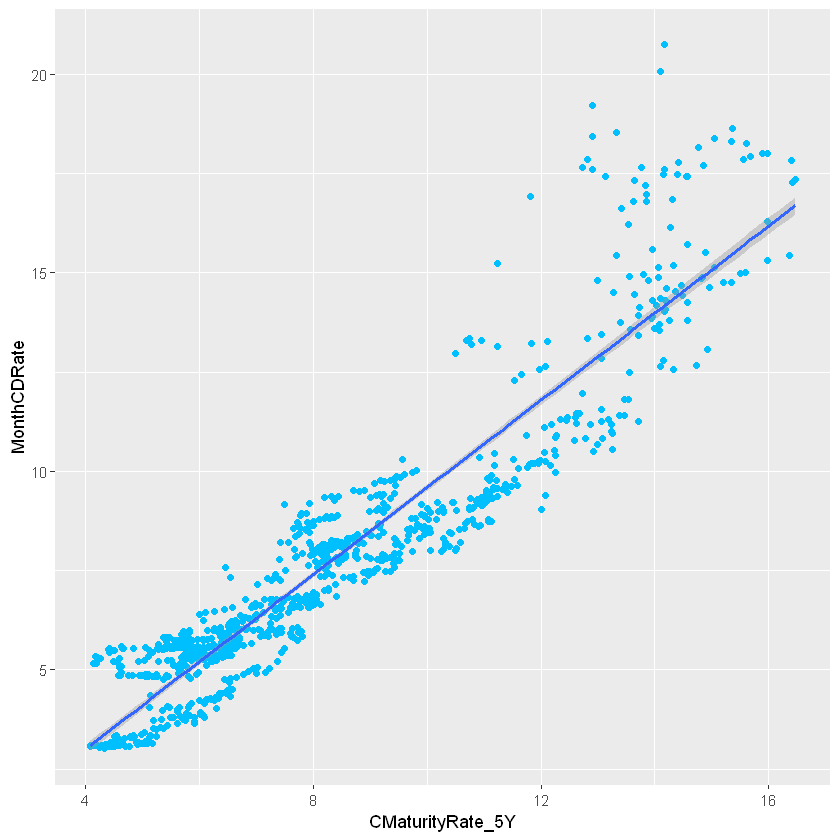

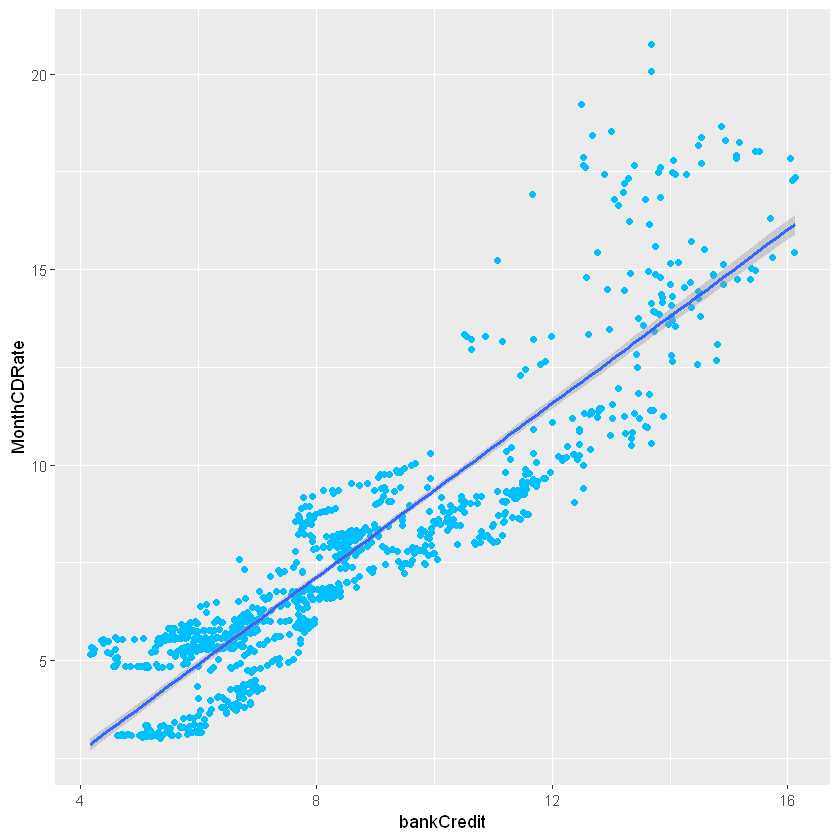

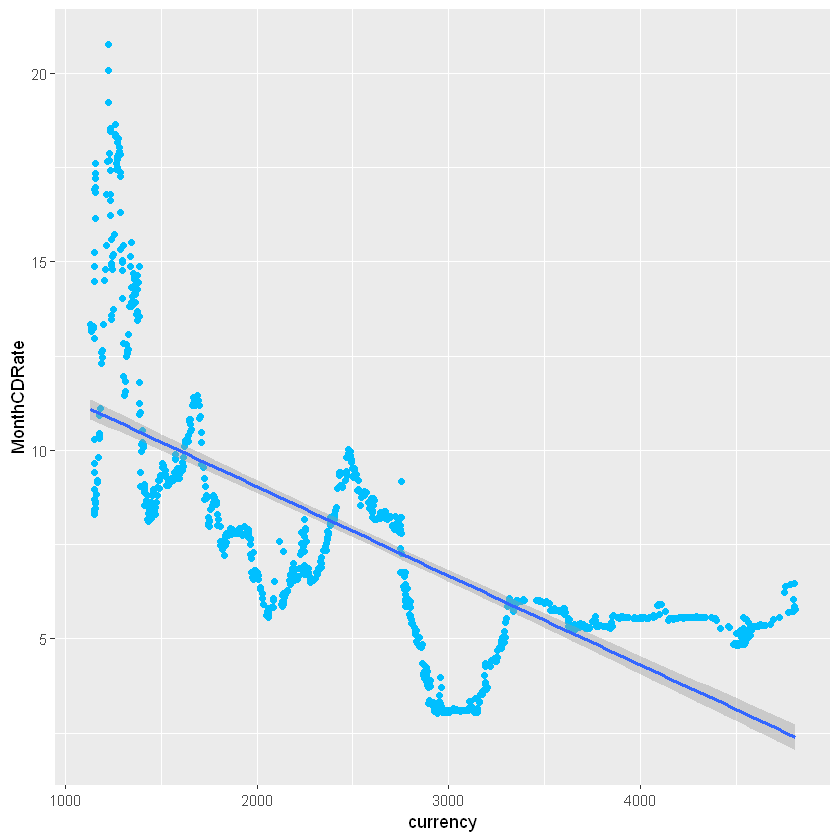

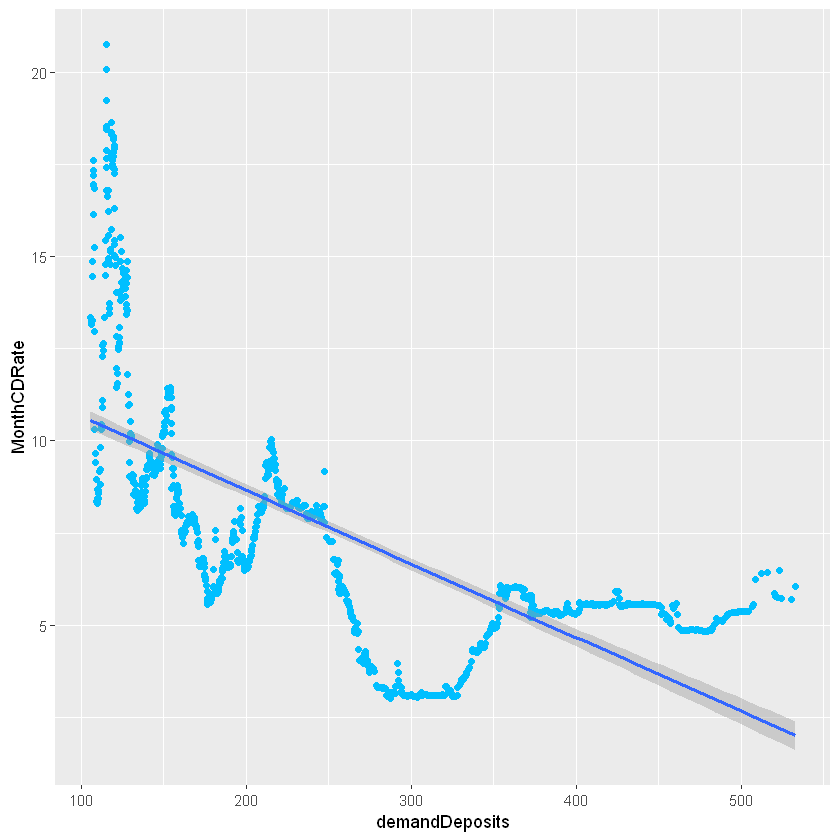

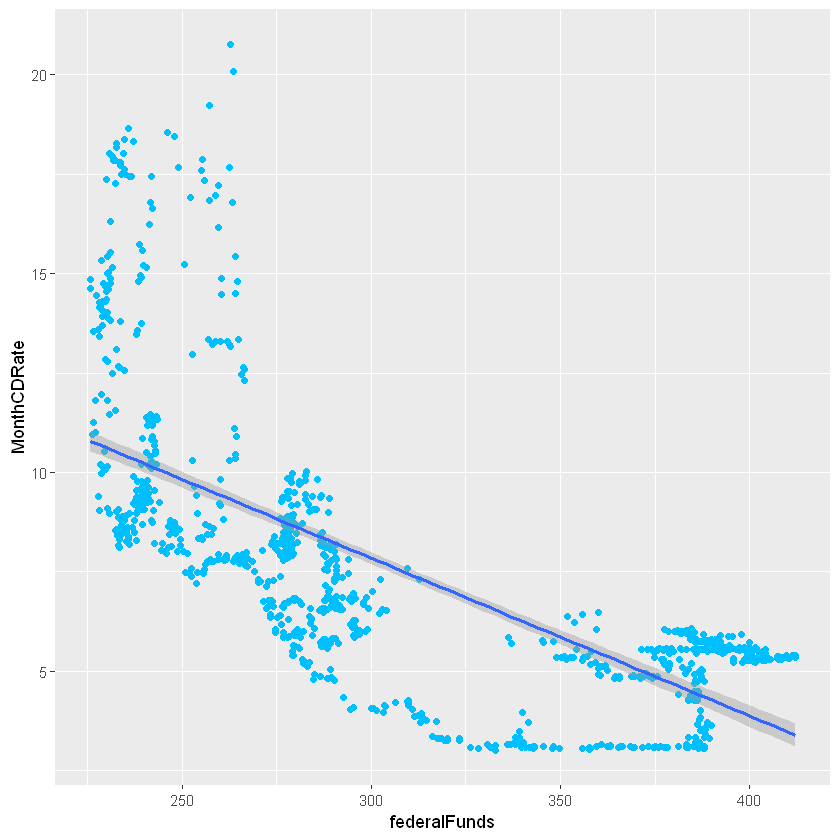

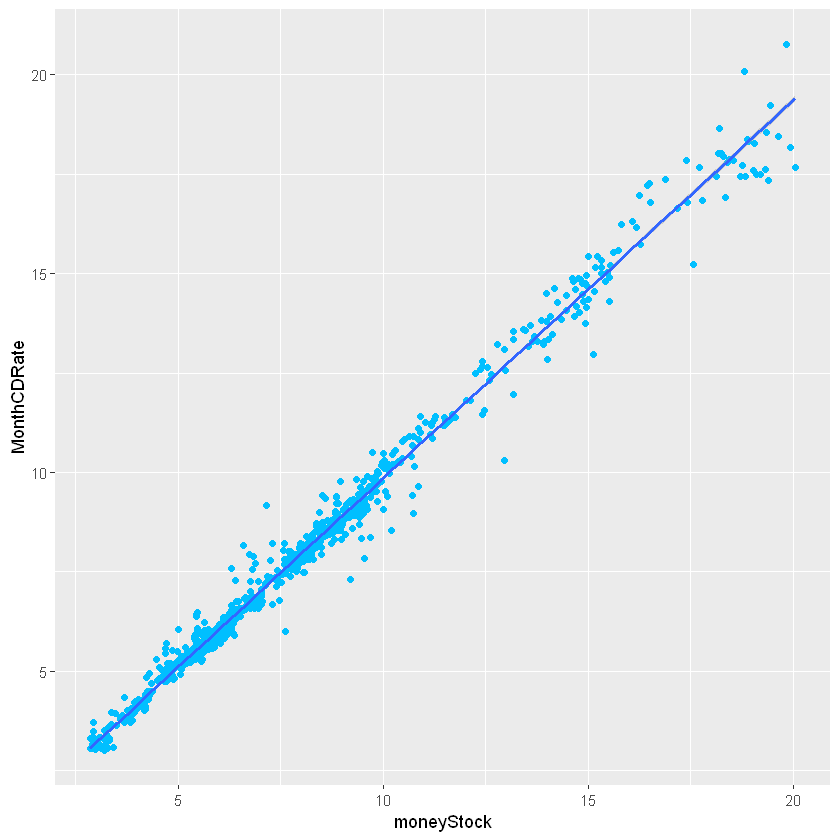

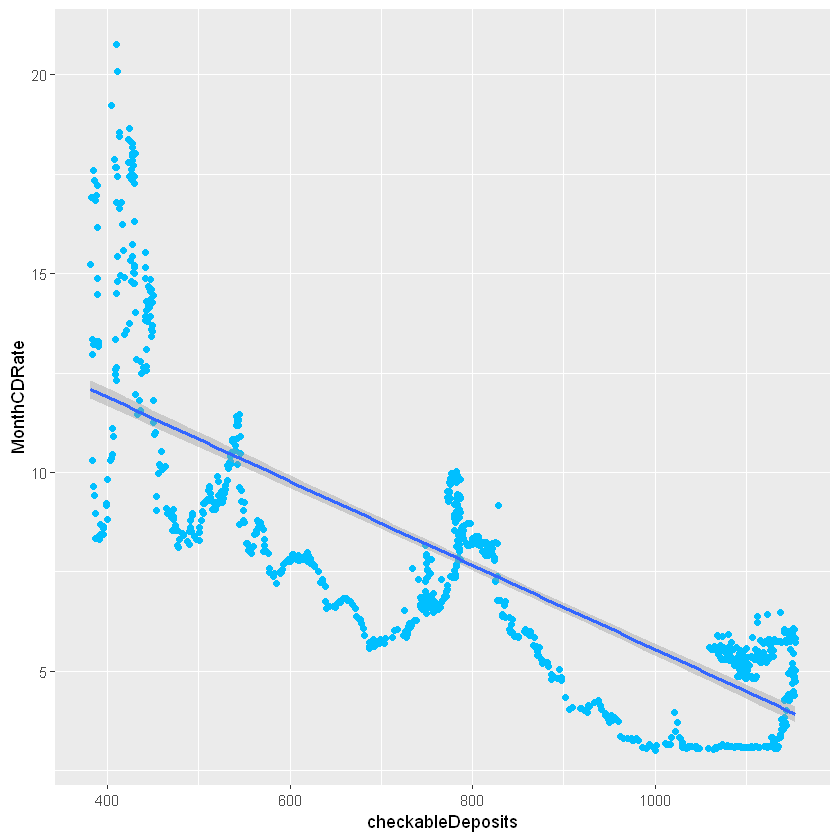

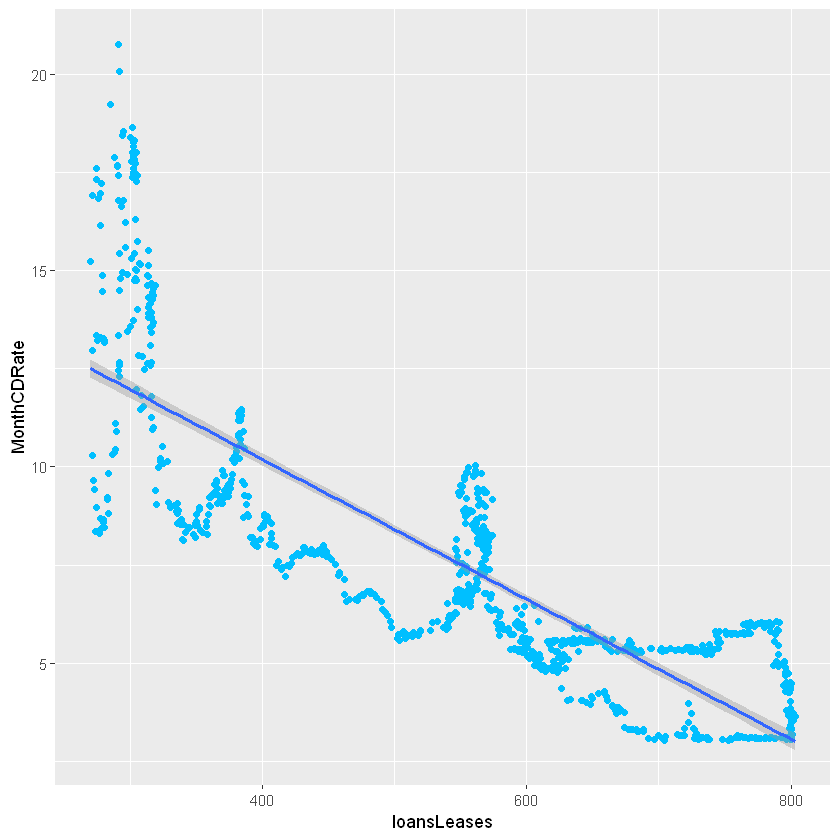

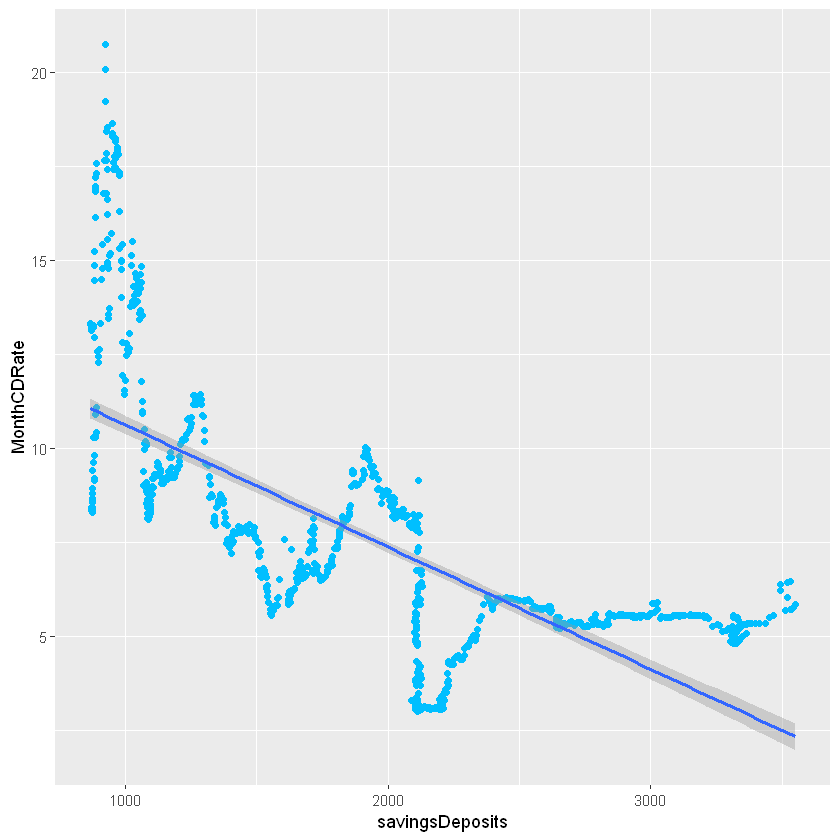

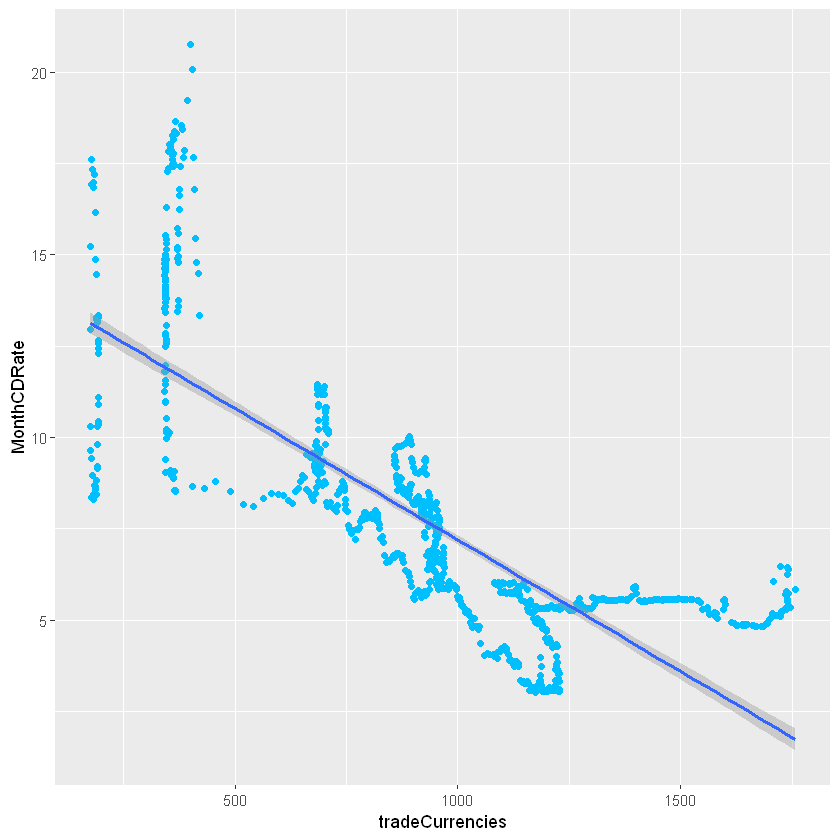

In [8]:
ggplot(treasury, aes(y=MonthCDRate,x=CMaturityRate_1Y)) +
    geom_point(col="deepskyblue") + geom_smooth(method="lm")
ggplot(treasury, aes(y=MonthCDRate,x=CMortgageRate_30Y)) +
    geom_point(col="deepskyblue") + geom_smooth(method="lm")
ggplot(treasury, aes(y=MonthCDRate,x=Rate_AuctionAverage_3M)) +
    geom_point(col="deepskyblue") + geom_smooth(method="lm")
ggplot(treasury, aes(y=MonthCDRate,x=Rate_SecondaryMarket_3M)) +
    geom_point(col="deepskyblue") + geom_smooth(method="lm")
ggplot(treasury, aes(y=MonthCDRate,x=CMaturityRate_3Y)) +
    geom_point(col="deepskyblue") + geom_smooth(method="lm")
ggplot(treasury, aes(y=MonthCDRate,x=CMaturityRate_5Y)) +
    geom_point(col="deepskyblue") + geom_smooth(method="lm")
ggplot(treasury, aes(y=MonthCDRate,x=bankCredit)) +
    geom_point(col="deepskyblue") + geom_smooth(method="lm")
ggplot(treasury, aes(y=MonthCDRate,x=currency)) +
    geom_point(col="deepskyblue") + geom_smooth(method="lm")
ggplot(treasury, aes(y=MonthCDRate,x=demandDeposits)) +
    geom_point(col="deepskyblue") + geom_smooth(method="lm")
ggplot(treasury, aes(y=MonthCDRate,x=federalFunds)) +
    geom_point(col="deepskyblue") + geom_smooth(method="lm")
ggplot(treasury, aes(y=MonthCDRate,x=moneyStock)) + 
    geom_point(col="deepskyblue") + geom_smooth(method="lm")
ggplot(treasury, aes(y=MonthCDRate,x=checkableDeposits)) + 
    geom_point(col="deepskyblue") + geom_smooth(method="lm")
ggplot(treasury, aes(y=MonthCDRate,x=loansLeases)) + 
    geom_point(col="deepskyblue") + geom_smooth(method="lm")
ggplot(treasury, aes(y=MonthCDRate,x=savingsDeposits)) + 
    geom_point(col="deepskyblue") + geom_smooth(method="lm")
ggplot(treasury, aes(y=MonthCDRate,x=tradeCurrencies)) + 
    geom_point(col="deepskyblue") + geom_smooth(method="lm")

Como se puede ver en algunos casos parece haber relaciones lineales entre algunas variables y la variable que queremos predecir, en otros casos no existe ninguna relación, por ello habrá que intentar transformarlas o pasar más tarde a hacer interacciones o añadir cuadrados/logaritmos a los modelos que hagamos.

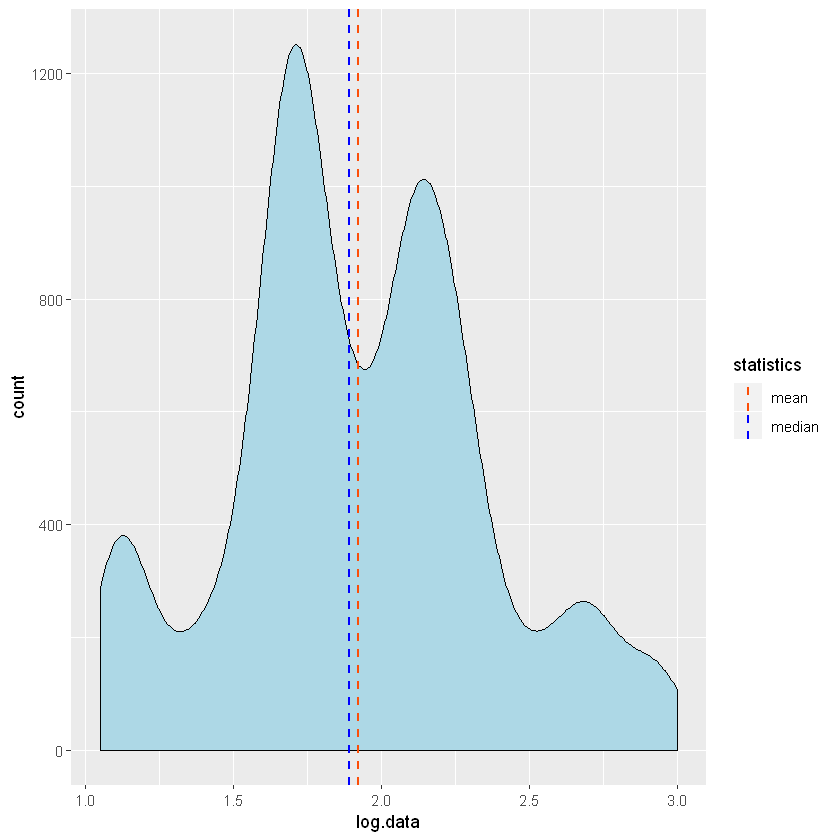

             log.data MonthCDRate
log.data    1.0000000   0.9561623
MonthCDRate 0.9561623   1.0000000
[1] 0.9946502


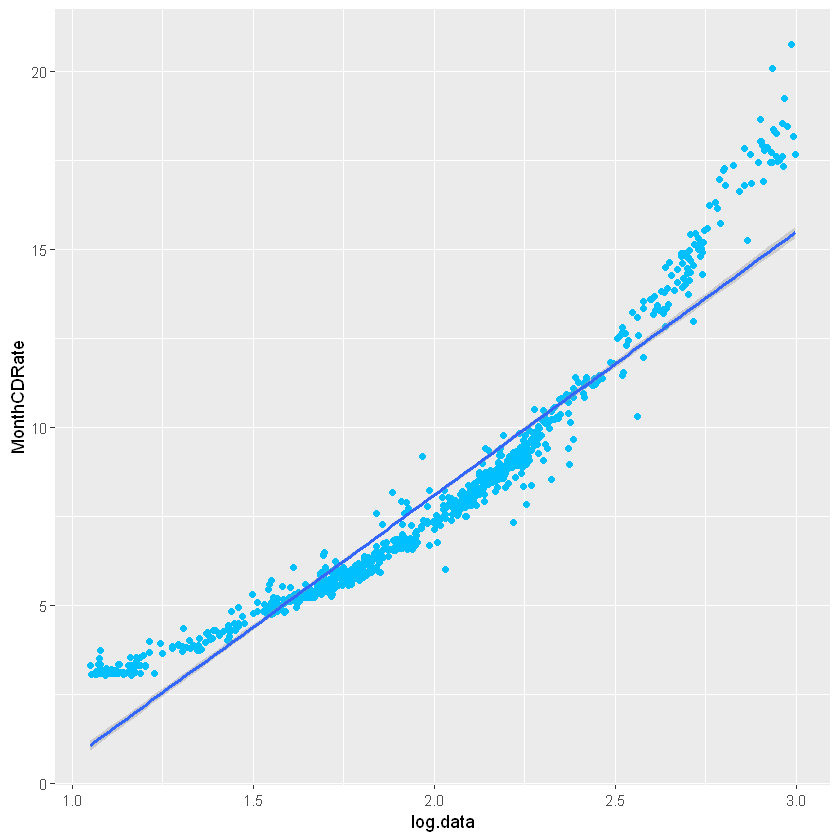

In [9]:
# Copiamos una variable del dataset para ver como le afectaría las transformaciones.
temp = treasury$moneyStock

log.temp = data.frame(log.data=log(temp))
log.temp$MonthCDRate = treasury$MonthCDRate
ggplot(log.temp,aes(x=log.data)) +
    geom_density(aes(y=..count..),fill='lightblue') +
        geom_vline(aes(xintercept = mean(log.data),
                       color = "mean"), 
             linetype = "dashed", size = 0.6) +
        geom_vline(aes(xintercept = median(log.data),
                       color="median"),
                  linetype = "dashed", size = 0.6 ) +
        scale_color_manual(name = "statistics", 
                values = c(mean = "#FC4E07", median = "blue"))

ggplot(log.temp, aes(y=MonthCDRate,x=log.data)) +
    geom_point(col="deepskyblue") + geom_smooth(method="lm")

print(cor(log.temp))
print(cor(treasury$moneyStock, treasury$MonthCDRate))
# Para este caso, es mejor no transformar la variable, ya que como se puede ver, pierde la relación lineal con nuestra
# variable predictora.

### Resumen
Para finalizar esta parte haremos un pequeño resumen de lo que se ha visto anteriormente.
* El dataset está formado por 1049 entradas, cada entrada cuenta con 15 variables, todas ellas continuas. Estas variables se tratan de diferentes datos sobre la economía de EEUU. También cuenta con una última variable llamada *MonthCDRate*, también continua, que contiene la tasa de interés que debe aplicarse a un producto financiero por un mes; esta es la variable que se debe predecir.
* Tras el cálculo de las medias y de la desviación típica, parece que los datos tienen bastante dispersión.
* Ninguna de las variables del conjunto de datos tienen una distribución normal, por lo que habrá que transformarlas para intentar que se asemejen más a dicha distribución. Por ejemplo, para las variables cuya distribución se parece a una normal pero están más a la izquierda, una transformación logaritmica puede ayudar.
* Algunas de las variables contienen outliers, en principio no los eliminaremos pero si que puede ser necesario eliminar algún dato suelto para las variables que se ajustan bien a un modelo lineal para que no afecten a los modelos.
* Algunas variables parecen estar correlacionadas, por lo cual puede ser interesante ver como afecta a los modelos quitar algunas de estas variables o realizar interacciones entre ellas, de forma que podamos obtener más información sobre el problema que estamos estudiando.

## Creación de modelos para el dataset.
En este apartado se verá la creación de modelos de regresión para predecir el valor de la variable *MonthCDRate*; para ello, se utilizarán modelos primero modelos de regresión lineal simple. Tras esto se pasará a utilizar modelos de regresión múltiple, a los cuales se les añadirá si es necesario o beneficia al modelo interacciones y no linealidad. Por último se aplicará el algoritmo de KNN.

### Modelos de regresión lineal.
En este apartado se van a estudiar cinco modelos de regresión lineal. Para estos modelos se utilizarán las variables que más se ajusten a una línea; dichas variables son *CMortgageRate_30Y*, *Rate_SecondaryMarket_3M*, *CMaturityRate_3Y*,*CMaturityRate_5Y* y *moneyStock* (se pueden mirar los scatterplots entre *MonthCDRate* y el resto de variables en el apartado anterior).


Call:
lm(formula = MonthCDRate ~ CMortgageRate_30Y, data = treasury)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1273 -0.3047 -0.0005  0.2845  5.0385 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -0.494992   0.058094  -8.521   <2e-16 ***
CMortgageRate_30Y  1.062699   0.007121 149.227   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.716 on 1047 degrees of freedom
Multiple R-squared:  0.9551,	Adjusted R-squared:  0.9551 
F-statistic: 2.227e+04 on 1 and 1047 DF,  p-value: < 2.2e-16


,2.5 %,97.5 %
(Intercept),-0.6089848,-0.3809985
CMortgageRate_30Y,1.0487255,1.0766730


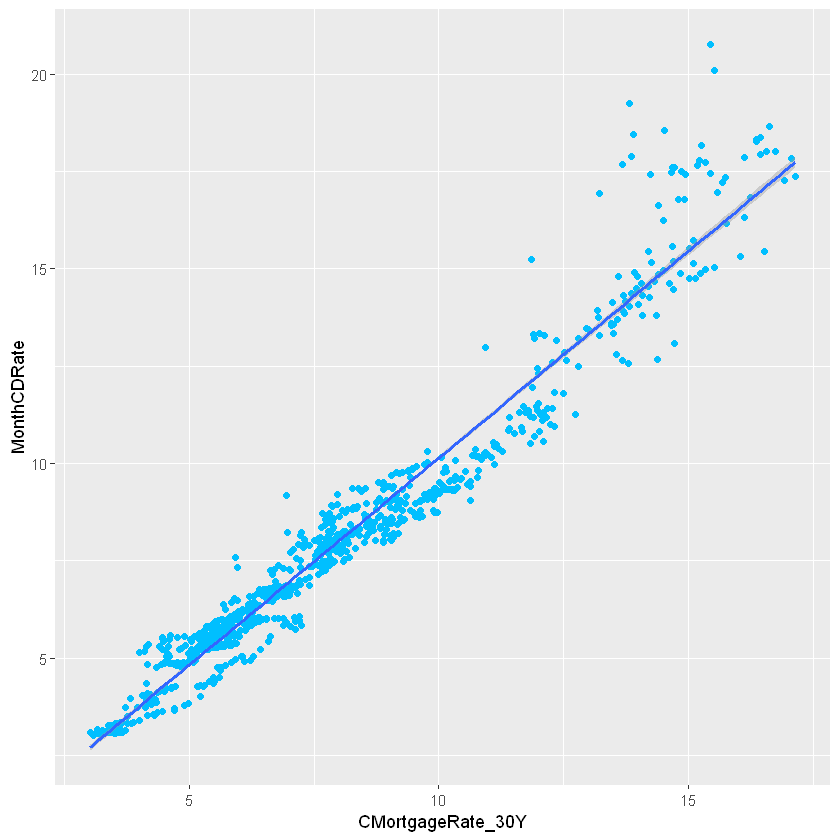

In [10]:
# Creamos el modelo.
fit1 = lm(MonthCDRate~CMortgageRate_30Y, data=treasury)
summary(fit1)

# Dibujamos el ajuste.
confint(fit1)
ggplot(treasury,aes(x=CMortgageRate_30Y,y=MonthCDRate)) + 
    geom_point(col="deepskyblue") + geom_smooth(method="lm")


Call:
lm(formula = MonthCDRate ~ Rate_SecondaryMarket_3M, data = treasury)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6394 -0.2313 -0.0473  0.1691  4.4752 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -0.23439    0.03655  -6.412 2.17e-10 ***
Rate_SecondaryMarket_3M  1.13211    0.00490 231.057  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4686 on 1047 degrees of freedom
Multiple R-squared:  0.9808,	Adjusted R-squared:  0.9807 
F-statistic: 5.339e+04 on 1 and 1047 DF,  p-value: < 2.2e-16


,2.5 %,97.5 %
(Intercept),-0.3061209,-0.1626654
Rate_SecondaryMarket_3M,1.1224961,1.1417248


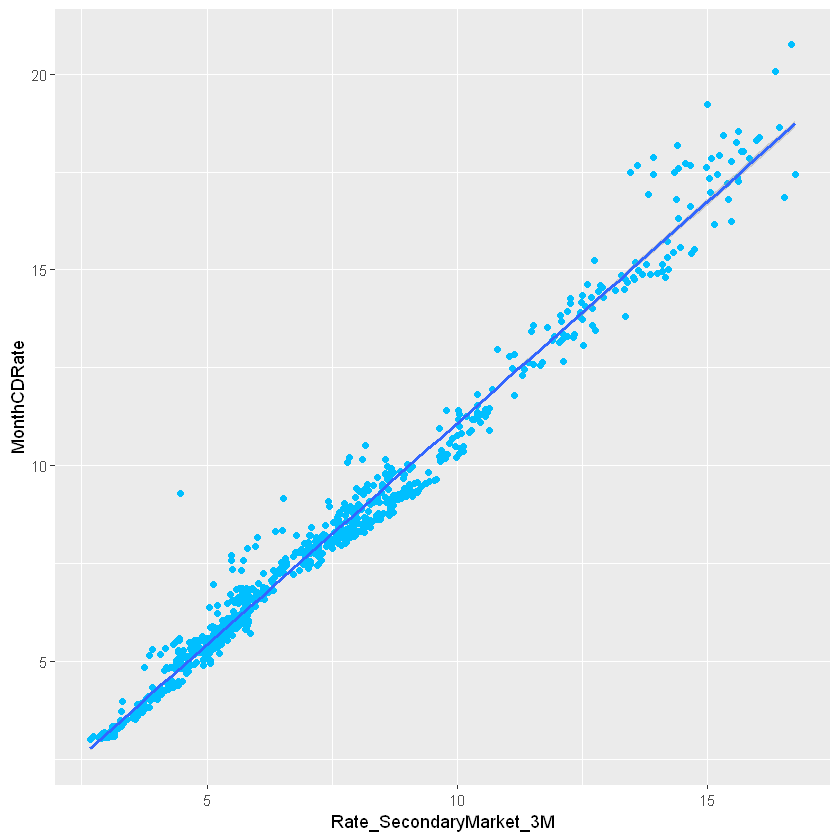

In [11]:
# Creamos el modelo.
fit2 = lm(MonthCDRate~Rate_SecondaryMarket_3M, data=treasury)
summary(fit2)

# Dibujamos el ajuste.
confint(fit2)
ggplot(treasury,aes(x=Rate_SecondaryMarket_3M,y=MonthCDRate)) + 
    geom_point(col="deepskyblue") + geom_smooth(method="lm")


Call:
lm(formula = MonthCDRate ~ CMaturityRate_3Y, data = treasury)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.09409 -0.20977 -0.04589  0.16718  2.83967 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.252144   0.033839  -7.451 1.93e-13 ***
CMaturityRate_3Y  1.138336   0.004551 250.137  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4335 on 1047 degrees of freedom
Multiple R-squared:  0.9835,	Adjusted R-squared:  0.9835 
F-statistic: 6.257e+04 on 1 and 1047 DF,  p-value: < 2.2e-16


,2.5 %,97.5 %
(Intercept),-0.3185431,-0.185745
CMaturityRate_3Y,1.1294066,1.147266


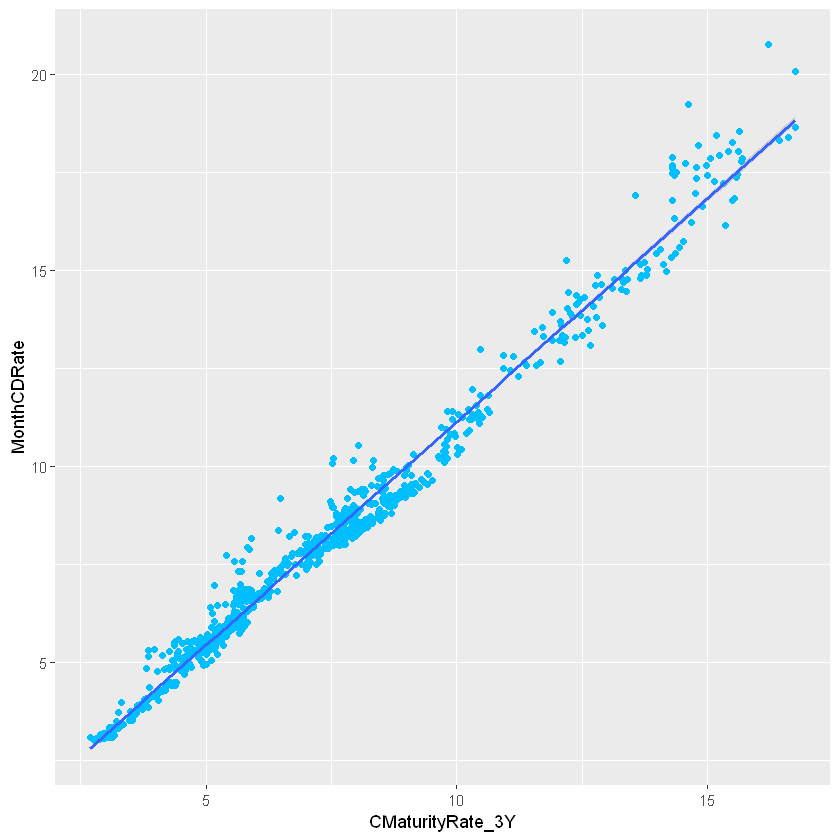

In [12]:
# Creamos el modelo.
fit3 = lm(MonthCDRate~CMaturityRate_3Y, data=treasury)
summary(fit3)

# Dibujamos el ajuste.
confint(fit3)
ggplot(treasury,aes(x=CMaturityRate_3Y,y=MonthCDRate)) + 
    geom_point(col="deepskyblue") + geom_smooth(method="lm")


Call:
lm(formula = MonthCDRate ~ CMaturityRate_5Y, data = treasury)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7461 -0.7861 -0.0870  0.5551  6.5906 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -1.39320    0.10820  -12.88   <2e-16 ***
CMaturityRate_5Y  1.09828    0.01256   87.44   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.173 on 1047 degrees of freedom
Multiple R-squared:  0.8796,	Adjusted R-squared:  0.8794 
F-statistic:  7646 on 1 and 1047 DF,  p-value: < 2.2e-16


,2.5 %,97.5 %
(Intercept),-1.605508,-1.180898
CMaturityRate_5Y,1.073633,1.122926


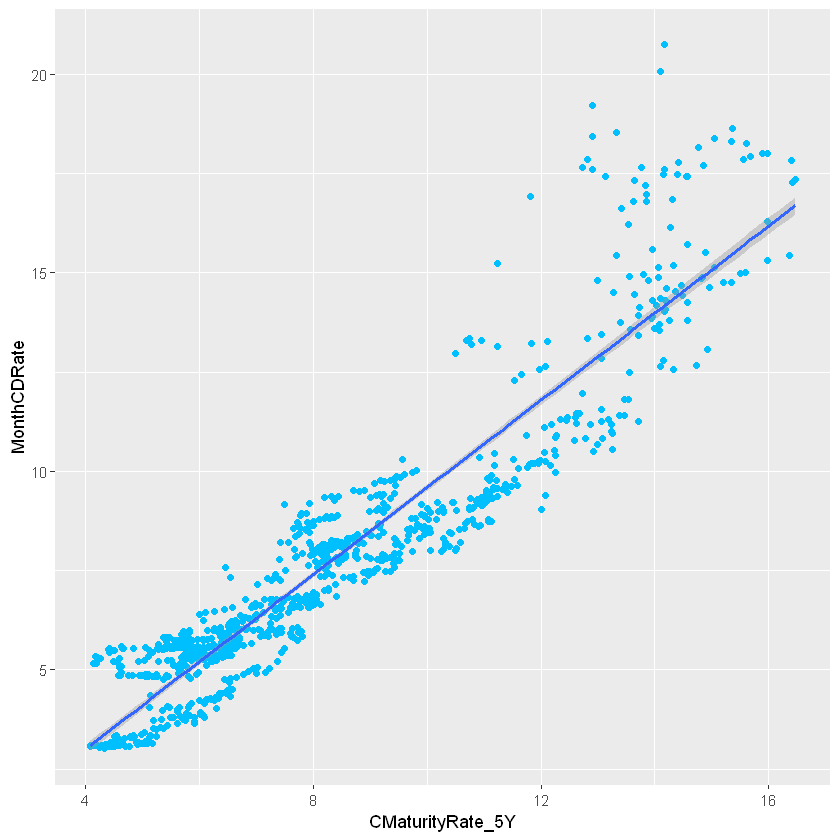

In [13]:
# Creamos el modelo.
fit4 = lm(MonthCDRate~CMaturityRate_5Y, data=treasury)
summary(fit4)

# Dibujamos el ajuste.
confint(fit4)
ggplot(treasury,aes(x=CMaturityRate_5Y,y=MonthCDRate)) + 
    geom_point(col="deepskyblue") + geom_smooth(method="lm")


Call:
lm(formula = MonthCDRate ~ moneyStock, data = treasury)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.35798 -0.11996 -0.01642  0.10068  2.01779 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.355430   0.025401   13.99   <2e-16 ***
moneyStock  0.949271   0.003047  311.56   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.349 on 1047 degrees of freedom
Multiple R-squared:  0.9893,	Adjusted R-squared:  0.9893 
F-statistic: 9.707e+04 on 1 and 1047 DF,  p-value: < 2.2e-16


,2.5 %,97.5 %
(Intercept),0.3055867,0.4052736
moneyStock,0.9432921,0.9552494


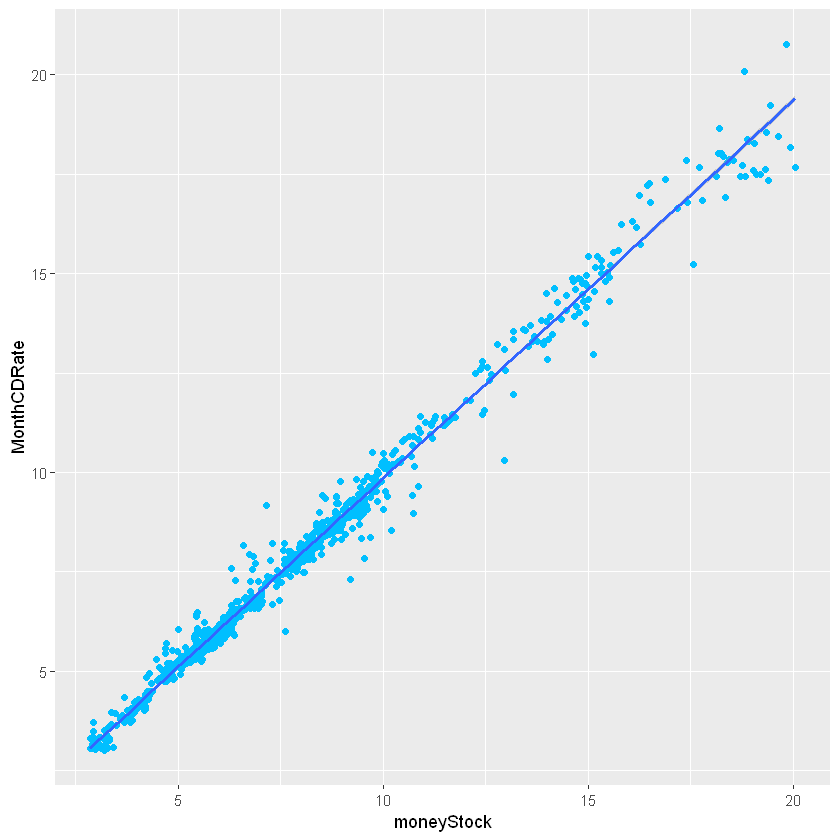

In [14]:
# Creamos el modelo.
fit5 = lm(MonthCDRate~moneyStock, data=treasury)
summary(fit5)

# Dibujamos el ajuste.
confint(fit5)
ggplot(treasury,aes(x=moneyStock,y=MonthCDRate)) + 
    geom_point(col="deepskyblue") + geom_smooth(method="lm")

Según lo visto en cada uno de los modelos, el mejor modelo es el aportado por la variable *moneyStock*; aunque el modelo con la variable *CMaturityRate_3Y* también es muy parecido. Para elegir el mejor modelo se ha mirado los valores del estadísitico R^2 Ajustado, donde *moneyStock* tiene el valor más alto (0.9893).

También a través de los modelos realizados, podemos ver que las variables analizadas tiene una relación positiva con la variable *MonthCDRate*, por ello, si aumenta el valor de *MonthCDRate* el valor de las otras variables también debe ser mayor.

Aunque solamente nos quedemos en este caso con el modelo de la variable *moneyStock*, hay que decir que para todos los modelos sale un p-valor muy bajo, lo cual quiere decir que son importantes para predecir el valor de la variable y por ello serán considerados cuando se vayan a crear modelos de regresión múltiple. Además, los modelos lineales simples obtenidos son bastante buenos y por ello seguramente el modelo de regresión múltiple obtenido no mejorará mucho los resultados de estos.

Ahora probaremos a hacer validación cruzada con las particiones del dataset que se han proprocionado junto con el dataset; para comprobar si hay sobreajuste y la calidad de nuestro mejor modelo obtenido.

In [15]:
nombre <- "treasury//treasury"
run_lm_fold <- function(i, x, tt = "test") {
    file <- paste(x, "-5-", i, "tra.dat", sep="")
    x_tra <- read.csv(file, comment.char="@", header=FALSE)
    file <- paste(x, "-5-", i, "tst.dat", sep="")
    x_tst <- read.csv(file, comment.char="@", header=FALSE)
    In <- length(names(x_tra)) - 1
    names(x_tra)[1:In] <- paste ("X", 1:In, sep="")
    names(x_tra)[In+1] <- "Y"
    names(x_tst)[1:In] <- paste ("X", 1:In, sep="")
    names(x_tst)[In+1] <- "Y"
    if (tt == "train") {
        test <- x_tra
    }
    else {
        test <- x_tst
    }
    fitMulti=lm(Y~X11,x_tra)
    yprime=predict(fitMulti,test)
    sum(abs(test$Y-yprime)^2)/length(yprime) ##MSE
}
lmMSEtrain.simple<-mean(sapply(1:5,run_lm_fold,nombre,"train"))
lmMSEtest.simple<-mean(sapply(1:5,run_lm_fold,nombre,"test"))
cat("train: ",lmMSEtrain.simple, "\n")
cat("test: ",lmMSEtest.simple, "\n")

train:  0.1215525 
test:  0.1219177 


Como podemos ver, los resultados del MSE de los datos de train y test son iguales, por lo que podemos concluir que no hay sobreajuste y que nuestro modelo se ajusta bien a los datos.

### Modelos de regresión múltiple
En este apartado se van a probar diferentes modelos de regresión lineal múltiple; para ello probaremos diferentes modelos con diferentes variables y probando interaciones entre las variables.

In [16]:
# Creamos el modelo
fit.multiple1 = lm(MonthCDRate~., treasury)

# Comprobamos los resultados
summary(fit.multiple1)


Call:
lm(formula = MonthCDRate ~ ., data = treasury)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.15400 -0.11350 -0.02425  0.06447  1.98636 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              0.3888300  0.2922598   1.330  0.18367    
CMaturityRate_1Y        -0.0078034  0.0010164  -7.677 3.75e-14 ***
CMortgageRate_30Y        0.1872664  0.0625423   2.994  0.00282 ** 
Rate_AuctionAverage_3M  -0.0177122  0.0212776  -0.832  0.40536    
Rate_SecondaryMarket_3M  0.0471672  0.0384214   1.228  0.21987    
CMaturityRate_3Y         0.2464712  0.0478963   5.146 3.18e-07 ***
CMaturityRate_5Y         0.1558061  0.1131354   1.377  0.16876    
bankCredit              -0.1422313  0.0770943  -1.845  0.06534 .  
currency                 0.0017686  0.0004687   3.773  0.00017 ***
demandDeposits           0.0191436  0.0103577   1.848  0.06485 .  
federalFunds             0.0001295  0.0005897   0.220  0.82618    
moneyStock             

Como se puede ver en los resultados, el modelo con todas las variables mejora el resultado del mejor modelo de con una sola variable (*moneyStock*). Aún así, podemos ver que algunas de las variables obtenidas no aportan ninguna información para el modelo, como por ejemplo *Rate_SecondaryMarket_3M*, que para el modelo lineal simple obtenia muy buenos resultados.

Lo siguientte que haremos será probar un modelo que combine solamente las variables que tienen un p-valor bajo dentro del modelo con todas las variables.

In [17]:
# Creamos el modelo
fit.multiple2 = lm(MonthCDRate~CMaturityRate_1Y+
                   CMortgageRate_30Y+CMaturityRate_3Y+
                   bankCredit+currency+demandDeposits+moneyStock+
                   checkableDeposits+loansLeases+savingsDeposits+
                   tradeCurrencies, treasury)

# Comprobamos los resultados
summary(fit.multiple2)


Call:
lm(formula = MonthCDRate ~ CMaturityRate_1Y + CMortgageRate_30Y + 
    CMaturityRate_3Y + bankCredit + currency + demandDeposits + 
    moneyStock + checkableDeposits + loansLeases + savingsDeposits + 
    tradeCurrencies, data = treasury)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1827 -0.1114 -0.0232  0.0627  1.9784 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        2.409e-01  1.717e-01   1.403 0.160860    
CMaturityRate_1Y  -7.480e-03  9.642e-04  -7.758 2.06e-14 ***
CMortgageRate_30Y  2.675e-01  3.280e-02   8.154 1.01e-15 ***
CMaturityRate_3Y   2.781e-01  2.669e-02  10.423  < 2e-16 ***
bankCredit        -6.094e-02  2.051e-02  -2.972 0.003031 ** 
currency           1.530e-03  4.408e-04   3.472 0.000539 ***
demandDeposits     1.857e-02  1.034e-02   1.797 0.072700 .  
moneyStock         5.767e-01  1.365e-02  42.242  < 2e-16 ***
checkableDeposits -2.501e-02  1.027e-02  -2.434 0.015104 *  
loansLeases        2.448e-02  1.03

Para este caso, el valor de R^2 ajustado no ha cambiado, por lo cual es mejor que el modelo anterior. Lo siguiente seguirá seguir quitando variables que tengan poca imporancia para el modelo, como *demanDeposits* o *checkableDeposits*.

In [18]:
# Creamos el modelo
fit.multiple3 = lm(MonthCDRate~CMaturityRate_1Y+
                   CMortgageRate_30Y+CMaturityRate_3Y+
                   currency+moneyStock+tradeCurrencies, treasury)

# Comprobamos los resultados
summary(fit.multiple3)


Call:
lm(formula = MonthCDRate ~ CMaturityRate_1Y + CMortgageRate_30Y + 
    CMaturityRate_3Y + currency + moneyStock + tradeCurrencies, 
    data = treasury)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.18774 -0.12047 -0.02864  0.06229  2.02888 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -9.455e-02  8.788e-02  -1.076    0.282    
CMaturityRate_1Y  -7.145e-03  7.530e-04  -9.488  < 2e-16 ***
CMortgageRate_30Y  1.490e-01  1.765e-02   8.441  < 2e-16 ***
CMaturityRate_3Y   3.316e-01  2.520e-02  13.159  < 2e-16 ***
currency          -1.233e-04  3.011e-05  -4.095 4.56e-05 ***
moneyStock         6.015e-01  1.334e-02  45.089  < 2e-16 ***
tradeCurrencies    7.414e-04  9.134e-05   8.117 1.33e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.245 on 1042 degrees of freedom
Multiple R-squared:  0.9948,	Adjusted R-squared:  0.9947 
F-statistic: 3.302e+04 on 6 and 1042 DF,  p-value

Al igual que en el modelo anterior, no empeora el resultados conforme al modelo anterior, por lo que nos quedaremos con este.Ahora, probaremos otro modelo con todas las variables que han utilizado para el modelo de regresión simple. Además se probarán con alguna interación entre variables o al cuadrado para intentar mejorar algo más los resultados.

In [19]:
# Creamos el modelo
fit.multiple4 = lm(MonthCDRate~CMortgageRate_30Y+CMaturityRate_3Y+
                   CMaturityRate_5Y+moneyStock+Rate_SecondaryMarket_3M,
                   treasury)

# Comprobamos los resultados
summary(fit.multiple4)


Call:
lm(formula = MonthCDRate ~ CMortgageRate_30Y + CMaturityRate_3Y + 
    CMaturityRate_5Y + moneyStock + Rate_SecondaryMarket_3M, 
    data = treasury)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.45339 -0.11979 -0.03982  0.07518  2.05279 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)              0.27634    0.03183   8.680  < 2e-16 ***
CMortgageRate_30Y        0.37978    0.03974   9.556  < 2e-16 ***
CMaturityRate_3Y         0.26208    0.04618   5.675 1.79e-08 ***
CMaturityRate_5Y        -0.21904    0.02248  -9.743  < 2e-16 ***
moneyStock               0.56423    0.01396  40.431  < 2e-16 ***
Rate_SecondaryMarket_3M  0.01592    0.04084   0.390    0.697    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2581 on 1043 degrees of freedom
Multiple R-squared:  0.9942,	Adjusted R-squared:  0.9942 
F-statistic: 3.568e+04 on 5 and 1043 DF,  p-value: < 2.2e-16


Para este modelo también podemos ver que no hay demasiada pérdida conforme con los modelos anteriores. Lo que sí es importantes de este modelo es que nos demuestra *Rate_SecondaryMarket_3M* realmente no afecta a la predicción de la variable *MonthCDRate*.

In [20]:
# Creamos el modelo
fit.multiple5 = lm(MonthCDRate~CMortgageRate_30Y+CMaturityRate_3Y+
                   CMaturityRate_5Y+moneyStock, treasury)

# Comprobamos los resultados
summary(fit.multiple5)


Call:
lm(formula = MonthCDRate ~ CMortgageRate_30Y + CMaturityRate_3Y + 
    CMaturityRate_5Y + moneyStock, data = treasury)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.44602 -0.11957 -0.03963  0.07661  2.05333 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.27727    0.03173   8.738   <2e-16 ***
CMortgageRate_30Y  0.38190    0.03935   9.705   <2e-16 ***
CMaturityRate_3Y   0.27593    0.02949   9.357   <2e-16 ***
CMaturityRate_5Y  -0.21984    0.02238  -9.823   <2e-16 ***
moneyStock         0.56477    0.01388  40.685   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.258 on 1044 degrees of freedom
Multiple R-squared:  0.9942,	Adjusted R-squared:  0.9942 
F-statistic: 4.463e+04 on 4 and 1044 DF,  p-value: < 2.2e-16


Para crear modelos con interación o no linealidad se probará con variables que parezca estar algo relacionadas del modelo *fit.multiple3* o que el ajuste lineal sea muy pobre.

In [21]:
# Creamos el modelo
fit.multiple6 = lm(MonthCDRate~CMaturityRate_1Y+
                   CMortgageRate_30Y+CMaturityRate_3Y+
                   currency+moneyStock+tradeCurrencies+
                   I(tradeCurrencies^2), treasury)

# Comprobamos los resultados
summary(fit.multiple6)


Call:
lm(formula = MonthCDRate ~ CMaturityRate_1Y + CMortgageRate_30Y + 
    CMaturityRate_3Y + currency + moneyStock + tradeCurrencies + 
    I(tradeCurrencies^2), data = treasury)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.20281 -0.11938 -0.02789  0.06348  2.03541 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -1.186e-02  1.213e-01  -0.098    0.922    
CMaturityRate_1Y     -7.302e-03  7.697e-04  -9.487  < 2e-16 ***
CMortgageRate_30Y     1.471e-01  1.776e-02   8.283 3.65e-16 ***
CMaturityRate_3Y      3.354e-01  2.549e-02  13.156  < 2e-16 ***
currency             -1.377e-04  3.343e-05  -4.117 4.14e-05 ***
moneyStock            5.984e-01  1.371e-02  43.639  < 2e-16 ***
tradeCurrencies       6.649e-04  1.197e-04   5.553 3.57e-08 ***
I(tradeCurrencies^2)  5.276e-08  5.339e-08   0.988    0.323    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.245 on 1041 degrees of free

Para *tradeCurrencies*^2 vemos que no aporta nada al modelo, así que lo quitaremos y probaremos con otras variables.

In [22]:
# Creamos el modelo
fit.multiple7 = lm(MonthCDRate~CMaturityRate_1Y+CMortgageRate_30Y+
                   CMaturityRate_3Y+
                   currency+moneyStock+
                   tradeCurrencies+
                   I(CMaturityRate_1Y*currency), treasury)

# Comprobamos los resultados
summary(fit.multiple7)

# Creamos el modelo
fit.multiple8 = lm(MonthCDRate~CMaturityRate_1Y+CMortgageRate_30Y+
                   CMaturityRate_3Y+
                   currency+moneyStock+tradeCurrencies+
                   I(CMortgageRate_30Y*moneyStock), treasury)

# Comprobamos los resultados
summary(fit.multiple8)


Call:
lm(formula = MonthCDRate ~ CMaturityRate_1Y + CMortgageRate_30Y + 
    CMaturityRate_3Y + currency + moneyStock + tradeCurrencies + 
    I(CMaturityRate_1Y * currency), data = treasury)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.21353 -0.11637 -0.02756  0.05733  2.02936 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     1.016e+00  2.786e-01   3.646 0.000279 ***
CMaturityRate_1Y               -1.807e-02  2.709e-03  -6.671 4.12e-11 ***
CMortgageRate_30Y               1.602e-01  1.771e-02   9.042  < 2e-16 ***
CMaturityRate_3Y                3.318e-01  2.500e-02  13.275  < 2e-16 ***
currency                       -6.019e-04  1.179e-04  -5.105 3.92e-07 ***
moneyStock                      5.876e-01  1.365e-02  43.062  < 2e-16 ***
tradeCurrencies                 5.938e-04  9.721e-05   6.109 1.42e-09 ***
I(CMaturityRate_1Y * currency)  5.538e-06  1.320e-06   4.197 2.94e-05 ***
---
Signif. codes:  0 


Call:
lm(formula = MonthCDRate ~ CMaturityRate_1Y + CMortgageRate_30Y + 
    CMaturityRate_3Y + currency + moneyStock + tradeCurrencies + 
    I(CMortgageRate_30Y * moneyStock), data = treasury)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.16646 -0.11213 -0.02969  0.06249  2.04527 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       -1.247e-02  9.548e-02  -0.131 0.896083    
CMaturityRate_1Y                  -6.654e-03  7.847e-04  -8.479  < 2e-16 ***
CMortgageRate_30Y                  1.410e-01  1.800e-02   7.835 1.15e-14 ***
CMaturityRate_3Y                   3.289e-01  2.518e-02  13.063  < 2e-16 ***
currency                          -1.156e-04  3.027e-05  -3.819 0.000142 ***
moneyStock                         5.843e-01  1.549e-02  37.731  < 2e-16 ***
tradeCurrencies                    7.060e-04  9.261e-05   7.624 5.54e-14 ***
I(CMortgageRate_30Y * moneyStock)  1.359e-03  6.238e-04   2.178 0.029

Este modelo se puede ver que mejorar algo el modelo anterior, aunque lo importante es que gracias al modelo podemos saber que entre la variable *CMaturityRate_1Y* y *currency* están relacionados. Con el segundo modelo se puede ver que también existe relación entre *CMortgageRate_30Y* y *moneyStock*.

Se ha probado con esta interación porque en la tabla de correlaciones que hay en el apartado de análisis exploratorio, también se han probado otras interaciones que tienen un correlación mayor, pero no han dado buenos resultados. Ahora se mostrará algún ejemplo de interacion que no funciona.

Lo siguiente será probar no linealidad con las variables.

In [23]:
# Creamos el modelo
fit.multiple9 = lm(MonthCDRate~CMaturityRate_1Y+
                   CMortgageRate_30Y+CMaturityRate_3Y+
                   currency+moneyStock+tradeCurrencies+
                   I(CMaturityRate_1Y*tradeCurrencies), treasury)

# Comprobamos los resultados
summary(fit.multiple9)


# Creamos el modelo
fit.multiple10 = lm(MonthCDRate~CMaturityRate_1Y+
                    CMortgageRate_30Y+CMaturityRate_3Y+
                   currency+moneyStock+tradeCurrencies+
                   I(moneyStock*tradeCurrencies), treasury)

# Comprobamos los resultados
summary(fit.multiple10)


Call:
lm(formula = MonthCDRate ~ CMaturityRate_1Y + CMortgageRate_30Y + 
    CMaturityRate_3Y + currency + moneyStock + tradeCurrencies + 
    I(CMaturityRate_1Y * tradeCurrencies), data = treasury)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.19680 -0.11993 -0.02838  0.05925  2.02634 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                            1.280e-01  3.007e-01   0.426  0.67051
CMaturityRate_1Y                      -9.407e-03  3.019e-03  -3.116  0.00188
CMortgageRate_30Y                      1.544e-01  1.900e-02   8.129 1.22e-15
CMaturityRate_3Y                       3.259e-01  2.622e-02  12.429  < 2e-16
currency                              -1.146e-04  3.214e-05  -3.566  0.00038
moneyStock                             6.013e-01  1.335e-02  45.048  < 2e-16
tradeCurrencies                        4.418e-04  3.978e-04   1.111  0.26697
I(CMaturityRate_1Y * tradeCurrencies)  2.878e-06  3.719e-06   0.7


Call:
lm(formula = MonthCDRate ~ CMaturityRate_1Y + CMortgageRate_30Y + 
    CMaturityRate_3Y + currency + moneyStock + tradeCurrencies + 
    I(moneyStock * tradeCurrencies), data = treasury)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.19103 -0.12030 -0.02751  0.06255  2.03323 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     -1.128e-01  9.609e-02  -1.174    0.241    
CMaturityRate_1Y                -7.094e-03  7.609e-04  -9.323  < 2e-16 ***
CMortgageRate_30Y                1.491e-01  1.766e-02   8.444  < 2e-16 ***
CMaturityRate_3Y                 3.324e-01  2.527e-02  13.154  < 2e-16 ***
currency                        -1.257e-04  3.057e-05  -4.113 4.21e-05 ***
moneyStock                       6.026e-01  1.353e-02  44.527  < 2e-16 ***
tradeCurrencies                  7.704e-04  1.102e-04   6.992 4.85e-12 ***
I(moneyStock * tradeCurrencies) -3.685e-06  7.845e-06  -0.470    0.639    
---
Signif. 

In [24]:
# Creamos el modelo
fit.multiple11 = lm(MonthCDRate~CMaturityRate_1Y+
                    CMortgageRate_30Y+CMaturityRate_3Y+
                   currency+moneyStock+tradeCurrencies+
                   I(CMaturityRate_1Y**2), treasury)

# Comprobamos los resultados
summary(fit.multiple11)


Call:
lm(formula = MonthCDRate ~ CMaturityRate_1Y + CMortgageRate_30Y + 
    CMaturityRate_3Y + currency + moneyStock + tradeCurrencies + 
    I(CMaturityRate_1Y^2), data = treasury)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.18894 -0.12154 -0.02913  0.06259  2.03489 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -4.705e-01  4.356e-01  -1.080 0.280326    
CMaturityRate_1Y       3.656e-04  8.556e-03   0.043 0.965929    
CMortgageRate_30Y      1.485e-01  1.766e-02   8.408  < 2e-16 ***
CMaturityRate_3Y       3.345e-01  2.541e-02  13.161  < 2e-16 ***
currency              -1.180e-04  3.071e-05  -3.842 0.000129 ***
moneyStock             5.980e-01  1.392e-02  42.960  < 2e-16 ***
tradeCurrencies        7.211e-04  9.422e-05   7.653 4.46e-14 ***
I(CMaturityRate_1Y^2) -3.503e-05  3.976e-05  -0.881 0.378407    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.245 on 1041 degre

In [25]:
# Creamos el modelo
fit.multiple12 = lm(MonthCDRate~CMaturityRate_1Y+
                    CMortgageRate_30Y+CMaturityRate_3Y+
                   currency+moneyStock+tradeCurrencies+
                   I(CMortgageRate_30Y**2), treasury)

# Comprobamos los resultados
summary(fit.multiple12)


Call:
lm(formula = MonthCDRate ~ CMaturityRate_1Y + CMortgageRate_30Y + 
    CMaturityRate_3Y + currency + moneyStock + tradeCurrencies + 
    I(CMortgageRate_30Y^2), data = treasury)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.17052 -0.11148 -0.02993  0.06271  2.04476 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             6.781e-03  9.853e-02   0.069   0.9451    
CMaturityRate_1Y       -6.703e-03  7.766e-04  -8.632  < 2e-16 ***
CMortgageRate_30Y       1.223e-01  2.122e-02   5.763 1.09e-08 ***
CMaturityRate_3Y        3.283e-01  2.519e-02  13.036  < 2e-16 ***
currency               -1.187e-04  3.012e-05  -3.942 8.62e-05 ***
moneyStock              5.997e-01  1.334e-02  44.962  < 2e-16 ***
tradeCurrencies         7.150e-04  9.191e-05   7.779 1.75e-14 ***
I(CMortgageRate_30Y^2)  1.593e-03  7.056e-04   2.258   0.0242 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2445 on

In [26]:
# Creamos el modelo
fit.multiple13 = lm(MonthCDRate~CMaturityRate_1Y+
                    CMortgageRate_30Y+CMaturityRate_3Y+
                   currency+moneyStock+tradeCurrencies+
                   I(CMaturityRate_3Y**2), treasury)

# Comprobamos los resultados
summary(fit.multiple13)


Call:
lm(formula = MonthCDRate ~ CMaturityRate_1Y + CMortgageRate_30Y + 
    CMaturityRate_3Y + currency + moneyStock + tradeCurrencies + 
    I(CMaturityRate_3Y^2), data = treasury)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.16154 -0.11232 -0.02877  0.06566  2.05330 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            1.572e-02  9.448e-02   0.166  0.86789    
CMaturityRate_1Y      -6.361e-03  7.914e-04  -8.038 2.46e-15 ***
CMortgageRate_30Y      1.576e-01  1.780e-02   8.856  < 2e-16 ***
CMaturityRate_3Y       2.831e-01  2.957e-02   9.572  < 2e-16 ***
currency              -1.073e-04  3.043e-05  -3.526  0.00044 ***
moneyStock             5.971e-01  1.336e-02  44.689  < 2e-16 ***
tradeCurrencies        6.791e-04  9.316e-05   7.289 6.16e-13 ***
I(CMaturityRate_3Y^2)  2.356e-03  7.601e-04   3.099  0.00199 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.244 on 1041 degre

In [27]:
# Creamos el modelo
fit.multiple14 = lm(MonthCDRate~CMaturityRate_1Y+
                    CMortgageRate_30Y+CMaturityRate_3Y+
                   currency+moneyStock+tradeCurrencies+
                   I(currency**2), treasury)

# Comprobamos los resultados
summary(fit.multiple14)


Call:
lm(formula = MonthCDRate ~ CMaturityRate_1Y + CMortgageRate_30Y + 
    CMaturityRate_3Y + currency + moneyStock + tradeCurrencies + 
    I(currency^2), data = treasury)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.20240 -0.11954 -0.02810  0.06546  2.03638 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        6.264e-02  1.759e-01   0.356   0.7219    
CMaturityRate_1Y  -7.556e-03  8.521e-04  -8.868  < 2e-16 ***
CMortgageRate_30Y  1.483e-01  1.767e-02   8.393  < 2e-16 ***
CMaturityRate_3Y   3.330e-01  2.524e-02  13.197  < 2e-16 ***
currency          -2.015e-04  8.156e-05  -2.470   0.0137 *  
moneyStock         5.987e-01  1.363e-02  43.925  < 2e-16 ***
tradeCurrencies    7.588e-04  9.288e-05   8.170 8.87e-16 ***
I(currency^2)      1.124e-08  1.090e-08   1.031   0.3026    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.245 on 1041 degrees of freedom
Multiple R-squared:  0.9948,	A

In [28]:
# Creamos el modelo
fit.multiple15 = lm(MonthCDRate~CMaturityRate_1Y+
                    CMortgageRate_30Y+CMaturityRate_3Y+
                   currency+moneyStock+tradeCurrencies+
                   I(moneyStock**2), treasury)

# Comprobamos los resultados
summary(fit.multiple15)


Call:
lm(formula = MonthCDRate ~ CMaturityRate_1Y + CMortgageRate_30Y + 
    CMaturityRate_3Y + currency + moneyStock + tradeCurrencies + 
    I(moneyStock^2), data = treasury)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.16909 -0.11496 -0.02943  0.06247  2.04367 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -3.843e-02  9.246e-02  -0.416 0.677774    
CMaturityRate_1Y  -6.692e-03  7.878e-04  -8.494  < 2e-16 ***
CMortgageRate_30Y  1.552e-01  1.792e-02   8.661  < 2e-16 ***
CMaturityRate_3Y   3.310e-01  2.516e-02  13.155  < 2e-16 ***
currency          -1.140e-04  3.046e-05  -3.743 0.000192 ***
moneyStock         5.751e-01  1.909e-02  30.123  < 2e-16 ***
tradeCurrencies    7.032e-04  9.334e-05   7.534 1.07e-13 ***
I(moneyStock^2)    9.766e-04  5.060e-04   1.930 0.053855 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2447 on 1041 degrees of freedom
Multiple R-squared:  0.9948

Para los ajustes de no linealidad podemos ver que la gran mayoría de las variables no aportan nada al modelo, solamente la variable *CMortgageRate_30Y* realmente aporta algo, aunque también podemos ver que para todos los modelos que realizan interaciones entre variables y no linealidad hacen que la variable *MonthCDRate* pierda importancia. Por ello, nos quedaremos con los modelos más simples que tengamos con buenos resultados; estos modelos serán *fit.multiple2* y *fit.multiple3*.

Probaremos estos modelos con validación cruzada, y nos quedaremos con el que mejores resultados nos ofrezca para después compararlo con otros modelos.

In [29]:
nombre <- "treasury//treasury"

run_lm_fold <- function(i, x, tt = "test") {
    file <- paste(x, "-5-", i, "tra.dat", sep="")
    x_tra <- read.csv(file, comment.char="@", header=FALSE)
    file <- paste(x, "-5-", i, "tst.dat", sep="")
    x_tst <- read.csv(file, comment.char="@", header=FALSE)
    In <- length(names(x_tra)) - 1
    names(x_tra)[1:In] <- paste ("X", 1:In, sep="")
    names(x_tra)[In+1] <- "Y"
    names(x_tst)[1:In] <- paste ("X", 1:In, sep="")
    names(x_tst)[In+1] <- "Y"
    if (tt == "train") {
        test <- x_tra
    }
    else {
        test <- x_tst
    }
    fitMulti=lm(Y~X1+X2+X5+X7+X8+X9+X11+X12+X13+X14+X15,x_tra)
    yprime=predict(fitMulti,test)
    sum(abs(test$Y-yprime)^2)/length(yprime) ##MSE
}
lmMSEtrain.multiple1<-mean(sapply(1:5,run_lm_fold,nombre,"train"))
lmMSEtest.multiple1<-mean(sapply(1:5,run_lm_fold,nombre,"test"))
cat("train: ",lmMSEtrain.multiple1, "\n")
cat("test: ",lmMSEtest.multiple1, "\n")

train:  0.05551181 
test:  0.05881755 


In [30]:
nombre <- "treasury//treasury"
run_lm_fold <- function(i, x, tt = "test") {
    file <- paste(x, "-5-", i, "tra.dat", sep="")
    x_tra <- read.csv(file, comment.char="@", header=FALSE)
    file <- paste(x, "-5-", i, "tst.dat", sep="")
    x_tst <- read.csv(file, comment.char="@", header=FALSE)
    In <- length(names(x_tra)) - 1
    names(x_tra)[1:In] <- paste ("X", 1:In, sep="")
    names(x_tra)[In+1] <- "Y"
    names(x_tst)[1:In] <- paste ("X", 1:In, sep="")
    names(x_tst)[In+1] <- "Y"
    if (tt == "train") {
        test <- x_tra
    }
    else {
        test <- x_tst
    }
    fitMulti=lm(Y~X1+X2+X5+X8+X11+X15,x_tra)
    yprime=predict(fitMulti,test)
    sum(abs(test$Y-yprime)^2)/length(yprime) ##MSE
}
lmMSEtrain.multiple2<-mean(sapply(1:5,run_lm_fold,nombre,"train"))
lmMSEtest.multiple2<-mean(sapply(1:5,run_lm_fold,nombre,"test"))
cat("train: ",lmMSEtrain.multiple2, "\n")
cat("test: ",lmMSEtest.multiple2, "\n")

train:  0.05938035 
test:  0.06181592 


Como se puede ver, el modelo *fit.multiple2* (lmMSE___.multiple1) obtiene mejores resultados que el modelo *fit.multiple3* (lmMSE___.multiple2); por ello, nos quedaremos con el modelo *fit.multiple2* para comparar.

Lo siguiente que vamos a hacer es, con las variables de nuestro mejor modelo, crearemos modelos con el algoritmo KNN.

### Modelos con el algoritmo KNN
En este apartado se van a probar diferentes modelos con el algoritmo KNN, después se elegirá el mejor y se realizará validación cruzada con este. Los modelos que se probarán será uno con todas las variables, uno con las variables elegidas del mejor modelo lineal múltiple; tras esto se probarán diferentes tamaños de k para ver si mejoran los resultados.

In [31]:
# cargamos la librería para utilizar knn
library(kknn)
treasury.norm = as.data.frame(lapply(treasury,
                               scale, center = TRUE, scale = TRUE))

In [32]:
# Creamos un modelo y calculamos su RMSE
fitknn1 = kknn(MonthCDRate~., treasury.norm, treasury.norm)
yprime = fitknn1$fitted.values
print(sqrt(sum((treasury.norm$MonthCDRate-yprime)^2)/length(yprime))) #RMSE

[1] 0.03389563


In [33]:
# Creamos un modelo y calculamos su RMSE
fitknn2 = kknn(MonthCDRate~CMaturityRate_1Y+
               CMortgageRate_30Y+CMaturityRate_3Y+
                   bankCredit+currency+demandDeposits+moneyStock+
                   checkableDeposits+loansLeases+savingsDeposits+
                   tradeCurrencies, treasury.norm, treasury.norm)
yprime = fitknn2$fitted.values
print(sqrt(sum((treasury.norm$MonthCDRate-yprime)^2)/length(yprime))) #RMSE

[1] 0.03502235


In [34]:
# Creamos un modelo y calculamos su RMSE
fitknn3 = kknn(MonthCDRate~CMaturityRate_1Y+
               CMortgageRate_30Y+CMaturityRate_3Y+
                   bankCredit+currency+demandDeposits+moneyStock+
                   checkableDeposits+loansLeases+savingsDeposits+
                   tradeCurrencies, treasury.norm, treasury.norm,k=5)
yprime = fitknn3$fitted.values
print(sqrt(sum((treasury.norm$MonthCDRate-yprime)^2)/length(yprime))) #RMSE

[1] 0.02877294


In [35]:
# Creamos un modelo y calculamos su RMSE
fitknn4 = kknn(MonthCDRate~., treasury.norm, treasury.norm,k=5)
yprime = fitknn4$fitted.values
print(sqrt(sum((treasury.norm$MonthCDRate-yprime)^2)/length(yprime))) #RMSE

[1] 0.02748709


In [36]:
# Creamos un modelo y calculamos su RMSE
fitknn5 = kknn(MonthCDRate~CMaturityRate_1Y+
               CMortgageRate_30Y+CMaturityRate_3Y+
                   bankCredit+currency+demandDeposits+moneyStock+
                   checkableDeposits+loansLeases+savingsDeposits+
                   tradeCurrencies, treasury.norm, treasury.norm,k=7)
yprime = fitknn5$fitted.values
print(sqrt(sum((treasury.norm$MonthCDRate-yprime)^2)/length(yprime))) #RMSE

[1] 0.03502235


In [37]:
# Creamos un modelo y calculamos su RMSE
fitknn6 = kknn(MonthCDRate~., treasury.norm, treasury.norm,k=7)
yprime = fitknn6$fitted.values
print(sqrt(sum((treasury.norm$MonthCDRate-yprime)^2)/length(yprime))) #RMSE

[1] 0.03389563


In [38]:
# Creamos un modelo y calculamos su RMSE
fitknn7 = kknn(MonthCDRate~CMaturityRate_1Y+
               CMortgageRate_30Y+CMaturityRate_3Y+
                   bankCredit+currency+demandDeposits+moneyStock+
                   checkableDeposits+loansLeases+savingsDeposits+
                   tradeCurrencies, treasury.norm, treasury.norm,k=9)
yprime = fitknn7$fitted.values
print(sqrt(sum((treasury.norm$MonthCDRate-yprime)^2)/length(yprime))) #RMSE

[1] 0.04026369


In [39]:
# Creamos un modelo y calculamos su RMSE
fitknn8 = kknn(MonthCDRate~., treasury.norm, treasury.norm,k=9)
yprime = fitknn8$fitted.values
print(sqrt(sum((treasury.norm$MonthCDRate-yprime)^2)/length(yprime))) #RMSE

[1] 0.03920956


Como se puede ver en los resultados anteriores, ambos modelos (con todas las variables, o solo con las variables seleccionadas del mejor modelo de regresión lineal múltiple) obtienen resultados muy parecidos. Además, con las pruebas hechas con diferentes tamaños de *k*, podemos ver que los modelos que mejores puntuaciones obtienen son aquellos con el valor de *k* igual a 5. Por ello, realizaremos validación cruzada a los dos modelos de que tiene *k* igual a 5 y veremos que resultados obtienen. Si el resultado no cambiara demasiado, nos quedaríamos con el modelo más simple.

In [40]:
nombre <- "treasury//treasury"
run_knn_fold <- function(i, x, tt = "test") {
    file <- paste(x, "-5-", i, "tra.dat", sep="")
    x_tra <- read.csv(file, comment.char="@", header=FALSE)
    file <- paste(x, "-5-", i, "tst.dat", sep="")
    x_tst <- read.csv(file, comment.char="@", header=FALSE)
    In <- length(names(x_tra)) - 1
    names(x_tra)[1:In] <- paste ("X", 1:In, sep="")
    names(x_tra)[In+1] <- "Y"
    names(x_tst)[1:In] <- paste ("X", 1:In, sep="")
    names(x_tst)[In+1] <- "Y"
    if (tt == "train") {
        test <- x_tra
    }
    else {
        test <- x_tst
    }
    x_tra = lapply(x_tra,scale, center = TRUE, scale = TRUE)
    test = lapply(test,scale, center = TRUE, scale = TRUE)
    fitMulti=kknn(Y~.,x_tra,test,k=5)
    yprime=fitMulti$fitted.values
    sum(abs(test$Y-yprime)^2)/length(yprime) ##MSE
}
knnMSEtrain.all<-mean(sapply(1:5,run_knn_fold,nombre,"train"))
knnMSEtest.all<-mean(sapply(1:5,run_knn_fold,nombre,"test"))
print(knnMSEtrain.all)
print(knnMSEtest.all)

[1] 0.0009382513
[1] 0.007427103


In [41]:
nombre <- "treasury//treasury"
run_knn_fold <- function(i, x, tt = "test") {
    file <- paste(x, "-5-", i, "tra.dat", sep="")
    x_tra <- read.csv(file, comment.char="@", header=FALSE)
    file <- paste(x, "-5-", i, "tst.dat", sep="")
    x_tst <- read.csv(file, comment.char="@", header=FALSE)
    In <- length(names(x_tra)) - 1
    names(x_tra)[1:In] <- paste ("X", 1:In, sep="")
    names(x_tra)[In+1] <- "Y"
    names(x_tst)[1:In] <- paste ("X", 1:In, sep="")
    names(x_tst)[In+1] <- "Y"
    if (tt == "train") {
        test <- x_tra
    }
    else {
        test <- x_tst
    }
    x_tra = lapply(x_tra,scale, center = TRUE, scale = TRUE)
    test = lapply(test,scale, center = TRUE, scale = TRUE)
    fitMulti=kknn(Y~X1+X2+X5+X7+X8+X9+X11+X12+X13+X14+X15 ,x_tra,test,k=5)
    
    yprime=fitMulti$fitted.values
    sum(abs(test$Y-yprime)^2)/length(yprime) ##MSE
}
knnMSEtrain.simple<-mean(sapply(1:5,run_knn_fold,nombre,"train"))
knnMSEtest.simple<-mean(sapply(1:5,run_knn_fold,nombre,"test"))
print(knnMSEtrain.simple)
print(knnMSEtest.simple)

[1] 0.0009965356
[1] 0.007039017


Tras los resultados obtenidos en la validación cruzada, nos quedaremos con el modelo más simple ya que obtiene mejores resultados en test que el modelo que utiliza todas las variables. Además, podemos apreciar que ambos modelo tienen sobreaprendizaje debido a la diferencia entre train y test.

## Comparación de modelos
En este apartado se compararán los modelos de regresión múltiple obtenidos, es decir, el modelo de regresión lineal múltiple, y el modelo creado a partir del algoritmo de KNN. También se compararán estos algoritmos con el algoritmo MD5. 

### Comparación de algoritmos de regresión múltiple
Como para el algoritmo de regresión múltiple lineal no tenemos hecha validación cruzada, crearemos este modelo y nos quedaremos con los errores medios. También calcularemos los resultados obtenidos por KNN sin utilizar normalización, para que no haya ninguna diferencia entre los datos utilizados por los algoritmos.

In [42]:
nombre <- "treasury//treasury"
run_lm_fold <- function(i, x, tt = "test") {
    file <- paste(x, "-5-", i, "tra.dat", sep="")
    x_tra <- read.csv(file, comment.char="@", header=FALSE)
    file <- paste(x, "-5-", i, "tst.dat", sep="")
    x_tst <- read.csv(file, comment.char="@", header=FALSE)
    In <- length(names(x_tra)) - 1
    names(x_tra)[1:In] <- paste ("X", 1:In, sep="")
    names(x_tra)[In+1] <- "Y"
    names(x_tst)[1:In] <- paste ("X", 1:In, sep="")
    names(x_tst)[In+1] <- "Y"
    if (tt == "train") {
        test <- x_tra
    }
    else {
        test <- x_tst
    }
    fitMulti=lm(Y~.,x_tra)
    yprime=predict(fitMulti,test)
    sum(abs(test$Y-yprime)^2)/length(yprime) ##MSE
}
lmMSEtrain.all<-mean(sapply(1:5,run_lm_fold,nombre,"train"))
lmMSEtest.all<-mean(sapply(1:5,run_lm_fold,nombre,"test"))
cat("train: ",lmMSEtrain.all, "\n")
cat("test: ",lmMSEtest.all, "\n")

train:  0.05514981 
test:  0.0606244 


In [43]:
nombre <- "treasury//treasury"
run_knn_fold <- function(i, x, tt = "test") {
    file <- paste(x, "-5-", i, "tra.dat", sep="")
    x_tra <- read.csv(file, comment.char="@", header=FALSE)
    file <- paste(x, "-5-", i, "tst.dat", sep="")
    x_tst <- read.csv(file, comment.char="@", header=FALSE)
    In <- length(names(x_tra)) - 1
    names(x_tra)[1:In] <- paste ("X", 1:In, sep="")
    names(x_tra)[In+1] <- "Y"
    names(x_tst)[1:In] <- paste ("X", 1:In, sep="")
    names(x_tst)[In+1] <- "Y"
    if (tt == "train") {
        test <- x_tra
    }
    else {
        test <- x_tst
    }
    fitMulti=kknn(Y~.,x_tra,test,k=5)
    yprime=fitMulti$fitted.values
    sum(abs(test$Y-yprime)^2)/length(yprime) ##MSE
}
knnMSEtrain.all<-mean(sapply(1:5,run_knn_fold,nombre,"train"))
knnMSEtest.all<-mean(sapply(1:5,run_knn_fold,nombre,"test"))
print(knnMSEtrain.all)
print(knnMSEtest.all)

[1] 0.0106916
[1] 0.04609969


Leemos los resultados de las tablas *regr_test_alumnos.csv* y *regr_train_alumnos.csv*. Allí reemplazaremos los resultados por los que se han obtenido en este estudio.

In [44]:
# Leemos los resultados de train.
resultados.train = read.csv("regr_train_alumnos.csv")
rownames(resultados.train) = resultados.train$X
resultados.train$X = NULL
resultados.train["treasury",]$out_train_lm = lmMSEtrain.all
resultados.train["treasury",]$out_train_kknn = knnMSEtrain.all

resultados.train

# Hacemos lo mismo para test.
resultados.test = read.csv("regr_test_alumnos.csv")
rownames(resultados.test) = resultados.test$X
resultados.test$X = NULL
resultados.test["treasury",]$out_test_lm = lmMSEtest.all
resultados.test["treasury",]$out_test_kknn = knnMSEtest.all

resultados.test

,out_train_lm,out_train_kknn,out_train_m5p
abalone,4.820000e+00,2.220000e+00,4.250000e+00
ANACALT,1.700000e-01,6.300000e-03,5.900000e-03
autoMPG6,1.129000e+01,3.530000e+00,6.870000e+00
autoMPG8,1.079000e+01,3.550000e+00,6.600000e+00
baseball,4.481590e+05,2.020880e+05,3.925890e+05
california,4.826190e+09,1.560869e+09,2.558518e+09
concrete,1.070000e+02,2.870000e+01,3.000000e+01
dee,1.618800e-01,7.611000e-02,1.620100e-01
delta_ail,2.960000e-08,1.400000e-08,2.510000e-08
delta_elv,2.100000e-06,1.050000e-06,2.020000e-06


,out_test_lm,out_test_kknn,out_test_m5p
abalone,4.950000e+00,5.400000e+00,4.680000e+00
ANACALT,1.700000e-01,1.200000e-02,7.000000e-03
autoMPG6,1.162000e+01,7.740000e+00,8.240000e+00
autoMPG8,1.140000e+01,8.110000e+00,8.350000e+00
baseball,5.366760e+05,5.661130e+05,5.464640e+05
california,4.844366e+09,3.845914e+09,3.158145e+09
concrete,1.090000e+02,6.835600e+01,3.800000e+01
dee,1.705200e-01,1.732600e-01,1.699600e-01
delta_ail,2.960000e-08,3.140000e-08,2.720000e-08
delta_elv,2.100000e-06,2.410000e-06,2.050000e-06


Ahora realizaremos el test de Wilcoxon para los datos de test.

In [45]:
# Preparamos los datos para realizar el test de Wilcoxon.
# Utilizaremos el modelo de KNN como referencia.
tablatst = resultados.test
difs = (tablatst[,1]-tablatst[,2])/tablatst[,1]
wilc_1_2 <- cbind(ifelse (difs<0, abs(difs)+0.1, 0+0.1),
                  ifelse (difs>0, abs(difs)+0.1, 0+0.1))
colnames(wilc_1_2) <- c(colnames(tablatst)[1], colnames(tablatst)[2])
head(wilc_1_2)

# Aplicamos el test e interpretamos los datos.
LMvsKNNtst <- wilcox.test(wilc_1_2[,1], wilc_1_2[,2],
                          alternative = "two.sided", paired=TRUE)
Rmas <- LMvsKNNtst$statistic
pvalue <- LMvsKNNtst$p.value
LMvsKNNtst <- wilcox.test(wilc_1_2[,2], wilc_1_2[,1],
                          alternative = "two.sided", paired=TRUE)
Rmenos <- LMvsKNNtst$statistic
Rmas
Rmenos
pvalue

out_test_lm,out_test_kknn
0.1909091,0.1000000
0.1000000,1.0294118
0.1000000,0.4339071
0.1000000,0.3885965
0.1548506,0.1000000
0.1000000,0.3061057


V 
78

V 
93

[1] 0.7660294

Según los resultados obtenidos,no hay diferencias significativas entre ambos algoritmos. Solamente tenemos un 23.4% de confianza (1-0.76603) que de los algoritmos sean distintos.

### Comparación de todos los algoritmos
Ya hemos visto que no hay diferencias significativas entre los algoritmos de regresión múltiple. Ahora, comprobaremos si existen diferencias significativas entre alguno de los algoritmos, es decir, tendremos también en cuenta los resultados proporcionados por el algoritmo M5'.

Para compararlos utilizaremos el test de Friedman, y analizaremos sus resultados. Después, independientemente de los resultados obtenidos por el test de Friedman, realizaremos un test post-hoc de Holm para comproabr si existe alguna diferencia entre los algoritmos.

In [46]:
# Realizamos el test de Friedman.
test_friedman = friedman.test(as.matrix(tablatst))
test_friedman


	Friedman rank sum test

data:  as.matrix(tablatst)
Friedman chi-squared = 8.4444, df = 2, p-value = 0.01467


Como podemos ver, el valor del p-valor del test de Friedman es muy pequeño, por lo que podemos concluir que existen diferencias significativas para al menos un par de algoritmos. Ahora realizaremos el test de Holm para que algoritmo es el que se diferencia.

In [47]:
# Aplicamos el test de Holm.
tam <- dim(tablatst)
groups <- rep(1:tam[2], each=tam[1])
pairwise.wilcox.test(as.matrix(tablatst),
                     groups, p.adjust = "holm",
                     paired = TRUE)


	Pairwise comparisons using Wilcoxon signed rank test 

data:  as.matrix(tablatst) and groups 

  1     2    
2 0.580 -    
3 0.081 0.108

P value adjustment method: holm 

Como se puede ver en la tabla que nos devuelve este test, el algoritmo 3 (M5'), obtiene diferencias significativas con respecto a los algoritmos 1 (regresión lineal múltiple) y 2 (KNN). Los otros dos algoritmos (regresión lineal múltiple y KNN) se pueden considerar iguales según la información obtenida en el test (y la obtenida anteriormente en el test de Wilcoxon).

### Comparaciones para los datos de train
Por último, se aplicarán los mismo test pero a los datos obtenidos en train, de esta forma podemos ver si existen diferencias entre los resultados de test y los de train.

In [48]:
# creamos la tabla para train y aplicacamos el test de Wilcoxon
# para los datos de regresión lineal múltiple y KNN.
tablatrain = resultados.train
difs = (tablatrain[,1]-tablatrain[,2])/tablatrain[,1]
wilc_1_2 <- cbind(ifelse (difs<0, abs(difs)+0.1, 0+0.1),
                  ifelse (difs>0, abs(difs)+0.1, 0+0.1))
colnames(wilc_1_2) <- c(colnames(tablatrain)[1], colnames(tablatrain)[2])
head(wilc_1_2)

# Aplicamos el test e interpretamos los datos.
LMvsKNNtst <- wilcox.test(wilc_1_2[,1], wilc_1_2[,2],
                          alternative = "two.sided", paired=TRUE)
Rmas <- LMvsKNNtst$statistic
pvalue <- LMvsKNNtst$p.value
LMvsKNNtst <- wilcox.test(wilc_1_2[,2], wilc_1_2[,1],
                          alternative = "two.sided", paired=TRUE)
Rmenos <- LMvsKNNtst$statistic
Rmas
Rmenos
pvalue

out_train_lm,out_train_kknn
0.1,0.6394191
0.1,1.0629412
0.1,0.7873339
0.1,0.7709917
0.1,0.6490708
0.1,0.7765836


V 
10

V 
161

[1] 0.000328064

Como se puede ver podemos afirmar que para train, con un 99.96% de confianza (1-0.0003281), existen diferencias entre los algoritmos. Esto es así porque el algoritmo KNN suele ajustarse mucho a los datos con los que se entrena (train), pero no tanto a los datos de test (sobreajuste); por ello, existen diferencias significativas en train pero no en test (como  se puede ver en el apartado anterior).

Ahora realizaremos el test de Friedman y post-hoc y analizaremos los resultados.

In [49]:
# Realizamos el test de Friedman.
test_friedman <- friedman.test(as.matrix(tablatrain))
test_friedman


	Friedman rank sum test

data:  as.matrix(tablatrain)
Friedman chi-squared = 20.333, df = 2, p-value = 3.843e-05


Al igual que en el apartado anterior, el test de Friedman nos muestra que existen diferencias entre los algoritmos que estamos comparando. Realizamos el test de Holm y analizamos los resultados obtenidos.

In [50]:
# Realizamos el test de Holm.
tam <- dim(tablatrain)
groups <- rep(1:tam[2], each=tam[1])
pairwise.wilcox.test(as.matrix(tablatrain),
                     groups, p.adjust = "holm", 
                     paired = TRUE)


	Pairwise comparisons using Wilcoxon signed rank test 

data:  as.matrix(tablatrain) and groups 

  1      2     
2 0.0031 -     
3 0.0032 0.0032

P value adjustment method: holm 

Según los resultados obtenidos para este test, no existen diferencias significativas entre los algoritmos que hemos comparado, a diferencia de los resultados de test. Esto ocurre por el sobreajuste de los algoritmos para los datos de train; dado que estamos comparando resultados obtenidos para los datos con los que se entrenan los algoritmos, y por lo tanto se ajustan mejor que para otros datos diferentes (test), es más difícil encontrar diferencias significativas.